<a href="https://colab.research.google.com/github/SERVIR/Explore_GEDI_EarthRISE_Training/blob/main/Exploring_Forest_Structure_with_GEDI_L2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Vegetation Structure with GEDI Level 2B - Footprint Canopy Cover and Vertical Profile Metrics**

<figure>
  <img src="https://svs.gsfc.nasa.gov/vis/a000000/a005000/a005095/GEDI_beams_PlantAreaIndex.06700_print.jpg" alt="Trulli" style="width:100%">
  <figcaption align="center"> Fig.1. "This visualization is a close up view of GEDI’s 8 beams, depicting vegetation height (rh100) with a white line and vertical profiles of Plant Area Index (pai_z) represented by scaled, color-coded spheres." -
    <a href="https://svs.gsfc.nasa.gov/vis/a000000/a005000/a005095/GEDI_beams_PlantAreaIndex.06700_print.jpg" target="_blank">
       NASA Scientific Visualization Studio.
    </a>
  </figcaption>
</figure>



## For additional scientific background, examples, and resources on GEDI and its applications, [explore this training series and references](https://servir.github.io/GEDI_Earthhub_ARSET_Training/)!

## Contact Info

**Email**: timothy.j.mayer@nasa.gov | stephanie.a.jimenez@nasa.gov

**Organization**: SERVIR & EarthRISE

**Website**: XXXXXXXX

**Supplementary information**: insert gitpage training link

**Date last modified**: 08-15-2025

Funding for this work was provided through the cooperative agreement 80MSFC22N0004 between NASA and UAH. SERVIR is a joint NASA- and USAID-led program.

# What this multi-regional data exploration demonstration offers you:

💻 **Easing access** to GEDI data:

*   **Automated** spatial, temporal, and variable selection for desired GEDI product levels as opposed to bulk or manual downloads with limited specifications.
*   Local and Google colab/temporary **on-the-fly** processing, storage, data exploration, and processing before final formatting and download.
*   **Singular platform** (Google colab) **for multi-technical and scientific process handling** such access to data center platforms, APIs, and within script mapping, statistics, and visualizations.


🧮 **Demonstration** of data exploration and processing techniques


*   Walk-through a suggested process for **taking key data charactersitics into account for your application**.
*   **Explore data availability** potentially impacted by spatial, temporal, data attribute, and location or use case contextual characteristics.
* **Investigate** several *currently* **recommended processing techniques** with statistics and visualizations.

💡 **Exemplifying real-world challenges** over selected locations:


*   Walk-through a suggested process for **scrutinizing your application and the viability of GEDI for your purposes**.
*   Investigate **GEDI availability and characteristic variations** across study areas.
*   **Compare study area characteristics and the relationships** to GEDI sensor capabilities.
*   Consider potential advantages or challenges to using GEDI over the study area **under given contexts**.

🪄 Detailed coding **documentation**


*  **Learn how** the code, libraries, and APIs function.
*  **Understand where** specifications and adjustments can be made for your application.



---

## Tutorial Overview
<ol>
  <li>Setup your environment and directories</li>
  <li>Access, filter and download the raw GEDI HDF5 files:
    <ol type="a">
      <li>Authenticate your EarthData Access login</li>
      <li>Create the Harmony API data product, spatial, and temporal request parameters and download the files</li>
    </ol>
  </li>
  <li>Subset the desired GEDI variables and convert the data to GeoDataFrame and CSV formats</li>
  </li>
  <li>Explore data quality filtering techniques</li>
  </li>
  <li>Generate the final dataset</li>
  </li>
  <li>Plot and explore the data</li>
  </li>
  </li>
  <li>Evaluate GEDI against other LiDAR data</li>
  </li>
</ol>


> ***Search for question marks "?" with "cmd + f" or "ctrl + f" to find places in the code where manual changes would need to be when adapting this script to your own study areas, or changing selections in GEDI products or data variables.***
---



## Data Access and Processing Workflow
Link to editable workflow (to be removed at the end) https://docs.google.com/drawings/d/1q49Oa-y9W5X25_Qijg0IuSczzcVrcOX5mVfiyIO_UmE/edit

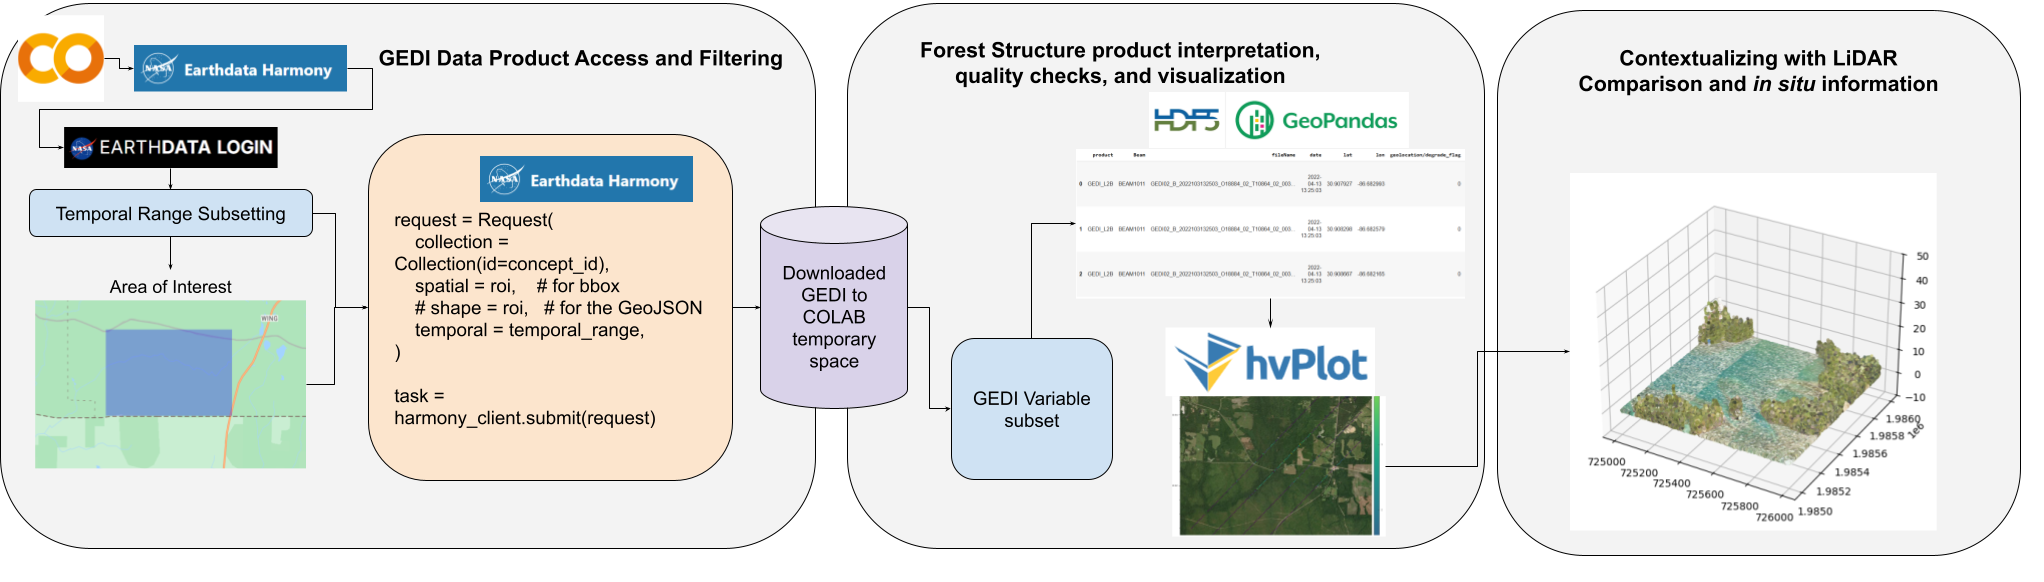



---


# Step 1) Setup your environment, and directories
## Tutorial Overview
<ol>
  <li>**Setup your environment and directories**</li>
  <li>Access, filter and download the raw GEDI HDF5 files:
    <ol type="a">
      <li>Authenticate your EarthData Access login</li>
      <li>Create the Harmony API data product, spatial, and temporal request parameters and download the files</li>
    </ol>
  </li>
  <li>Subset the desired GEDI variables and convert the data to GeoDataFrame and CSV formats
  </li>
  <li>Explore data quality filtering techniques
  </li>
  <li>Generate the final filtered dataset</li>
  </li>
  <li>Plot and explore the data
  </li>
  </li>
  <li>Evaluate GEDI against other LiDAR data
  </li>
</ol>

**Colab Setup**

![alt text](https://colab.research.google.com/img/colab_favicon.ico)

Google colab is a free, Jupyter notebook style python interface.

Here are some resources on colab:


*   [Welcome to colab](https://colab.research.google.com/)
*   [Beginner's guide to colab](https://www.marqo.ai/blog/getting-started-with-google-colab-a-beginners-guide)
*   [Complete Beginner's Tutorial to Google Colab](https://www.youtube.com/watch?v=JJYZ3OE_lGo)



**Run the pip install to load the required packages**

Re-run the cell if/when the restart prompt is given. (Sometimes a re-run is not necessary even if it prompts you to "restart session" if the ✅ shows after the cell runs, you can hit cancel.)

In [1]:
!pip install earthaccess harmony-py hvplot folium geopandas geoviews

**Connect to your Google drive**

This is a relevant step if you are trying to import data hosted on your drive, or to save results from this script to your drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Make a new folder for your colab working space**

In [3]:
#? If you are working with non-L2B products, change the folder name here.
!mkdir GEDI_L2b

#? If you are plugging in AOIs not from this tutorial, change the sub-folder names here.
!mkdir GEDI_L2b/SPB_AOI #?
!mkdir GEDI_L2b/Prescribed_Burn_AOI #?
!mkdir GEDI_L2b/Sewanee_Domain #?
!mkdir GEDI_L2b/PaintRock_AOI #?

In [4]:
# Create a variable for a list of the output directories where the Harmony Request will handle the files for each AOI
#? If you are plugging in your own AOI, change the paths to the subfolders here.
output_dirs = [
    '/content/GEDI_L2b/SPB_AOI', #?
    '/content/GEDI_L2b/Prescribed_Burn_AOI', #?
    '/content/GEDI_L2b/PaintRock_AOI', #?
    '/content/GEDI_L2b/Sewanee_Domain' #?
]

**Change directory to that new folder**

In [5]:
#? If you are working with non-L2B products, change the folder name here.
%cd /content/GEDI_L2b

/content/GEDI_L2b


**Load the required packages**

In [34]:
from harmony import BBox, Client, Collection, Request, CapabilitiesRequest
import h5py
from datetime import datetime
import json
import earthaccess
import geopandas as gp
import pandas as pd
import numpy as np
import os
from IPython.display import JSON
from IPython.display import display, HTML
import hvplot.pandas
import folium
from folium import GeoJson
import requests
from io import StringIO
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import cm, colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap
import textwrap
from mpl_toolkits.mplot3d import Axes3D
from holoviews import opts
import shapely
from shapely.geometry import shape
from shapely.geometry import Point

os.chdir('../../') #correct the current working directory.



---


# Step 2) Access, filter, and download the raw GEDI HDF5 files


## Tutorial Overview
<ol>
  <li>Setup your environment and directories</li>
  <li><strong>Access, filter and download the raw GEDI HDF5 files:
    <ol type="a">
      <li>Authenticate your EarthData Access login</li>
      <li>Create the Harmony API data product, spatial, and temporal request parameters and download the files</strong></li>
    </ol>
  </li>
  <li>Subset the desired GEDI variables and convert the data to GeoDataFrame and CSV formats
  </li>
  <li>Explore data quality filtering techniques
  </li>
  <li>Generate the final filtered dataset</li>
  </li>
  <li>Plot and explore the data
  </li>
  </li>
  <li>Evaluate GEDI against other LiDAR data
  </li>
</ol>

## 2.1) Authenticate your EarthData Access login

**Pause here:** have your username and password ready.

See the [EarthData Login](https://urs.earthdata.nasa.gov/) if you do not have an account yet.

`earthaccess.login()` is used here to access NASA Earthdata Login (EDL) credentials stored in a .netrc file and allows users to type their credentials and persist them to a .netrc file if one does not exist.

In [7]:
auth = earthaccess.login(persist=True)
#auth.token

Enter your Earthdata Login username: sj0114
Enter your Earthdata password: ··········


## 2.2) Create a Harmony Request

[NASA's Harmony Services](https://harmony.earthdata.nasa.gov/) provide access to services that can transform data from NASA's [Earth Observing Systems Data and Information System (EOSDIS)](https://www.earthdata.nasa.gov/eosdis) Distributed Active Archive Centers (DAAC). [`harmony-py`](https://github.com/nasa/harmony-py) Python package is the recommended way of interacting with Harmony API service.

There are several parameters that can be used for the Harmony request. See [the documentation](https://harmony-py.readthedocs.io/en/latest/) and [the introductory Harmony tutorial ](https://github.com/nasa/harmony-py/blob/main/examples/intro_tutorial.ipynb) for more details.


This notebook shows customized query and access of selected GEDI data products housed under the respective NASA DAAC. Visit the [GEDI mission webpage](https://gedi.umd.edu/data/download/) to view which data products are under [NASA's LP DAAC](https://lpdaac.usgs.gov/) or [ORNL DAAC](https://www.earthdata.nasa.gov/centers/ornl-daac).

**To access data through Harmony service, we need to create a Harmony Client object using either your EDL token or your Earthdata Login credentials.**

Below, `username` and `password` are directly provided to `Client` function. See [here](https://github.com/nasa/harmony-py/blob/main/examples/intro_tutorial.ipynb) for other options you can create Harmony Client object.

In [8]:
harmony_client = Client(auth=(auth.username, auth.password))

### 2.2.1) Select the GEDI data product

#### 2.2.1.a) Get the GEDI Collections Harmony API Capabilities

First lets investigate what capabilites Harmony has to request data.

To investigate GEDI's canopy cover and vegetation metrics, we will use `short_name` = `'GEDI02_B'`.


*   If you are accessing the footprint level raw geolocated waveforms, use `'GEDI01_B'`
*   If you are accessing the footprint level elevation and relative height metrics, use `'GEDI02_A'`
*   If you are accessing the footprint level above ground biomass estimations, use `'GEDI04_A'`


In the `print()` statement, you can review information such as
`  "conceptId",
  "shortName",
  "variableSubset",
  "bboxSubset",
  "shapeSubset",
  "temporalSubset",
  "concatenate",
  "reproject",
  "outputFormats"`

In [203]:
gedi_product = 'GEDI02_B' #? Change this variable to select the product level

In [204]:
capabilities = harmony_client.submit(CapabilitiesRequest(short_name=gedi_product))
print(json.dumps(capabilities, indent=2))

{
  "conceptId": "C2142776747-LPCLOUD",
  "shortName": "GEDI02_B",
  "variableSubset": true,
  "bboxSubset": true,
  "shapeSubset": true,
  "temporalSubset": true,
  "concatenate": false,
  "reproject": false,
  "outputFormats": [
    "application/x-hdf"
  ],
  "services": [
    {
      "name": "sds/trajectory-subsetter",
      "href": "https://cmr.earthdata.nasa.gov/search/concepts/S2836723123-XYZ_PROV",
      "capabilities": {
        "subsetting": {
          "temporal": true,
          "bbox": true,
          "shape": true,
          "variable": true
        },
        "output_formats": [
          "application/x-hdf"
        ]
      }
    }
  ],
  "variables": [
    {
      "name": "/BEAM0000/algorithmrun_flag",
      "href": "https://cmr.earthdata.nasa.gov/search/concepts/V2837647264-LPCLOUD"
    },
    {
      "name": "/BEAM0000/ancillary/dz",
      "href": "https://cmr.earthdata.nasa.gov/search/concepts/V2837647474-LPCLOUD"
    },
    {
      "name": "/BEAM0000/ancillary/l2a_al

#### 2.2.1.b) Get the GEDI Collection Concept ID

`collection` is a required parameter in the Harmony Request function. This collection is determined by the `conceptId`, which is the NASA EOSDIS collection ID.

The concept ID is provided in the Common Metadata Repository [(CMR)](https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html) metadata **OR** a product short name (e.g. 'C2142776747-LPCLOUD') can be provided to search for collections.

In [205]:
print(capabilities['shortName'], ',', capabilities['conceptId'])

# Save the desired data collection concept ID to a variable
concept_id = capabilities['conceptId']
print("concept_id:", concept_id)

GEDI02_B , C2142776747-LPCLOUD
concept_id: C2142776747-LPCLOUD


### 2.2.2) Establish the spatial filter based on the Areas of Interest (AOIs)

Add relivant biophysical and forest informaiton regarind these sites see  the folder here with the docs to support this: https://drive.google.com/drive/folders/1WvBSUIHy6I05j8s1ZZRarho5qnG2wdnb

**Southern Pine Beetle**

<figure>
  <img src = "https://: alt="Trulli" style="width:100%">
  <figcaption align = "center">Fig.X - .</
figcaption>
</figure>

who (partners, SCO pitch, impacted people or business, etc. in SE USA and alabama),

what (beetle infestations, what they are, how they behave, how are they currently addressed),

where (where infestations occur, changing patterns of occurance, more details on the provided AOI for this tutorial,

when (what is the observation for this provided AOI and why this selected time period),

why (what is the current challenge, what don't we understand and why? who is acting to solve these issues, why explore the capabilities of GEDI in this tutorial for SPB?, and

how (how can remote sensing help address this issue? insert previous description of GEDI data products relevance to this application.)

**Prescribed Burn**

<figure>
  <img src = "https://: alt="Trulli" style="width:100%">
  <figcaption align = "center">Fig.X - .</
figcaption>
</figure>

who (partners, SCO pitch, impacted people or business, etc. in SE USA and alabama),

what (what is prescribed burning, how it works, how they are planned and managed in this area, what role they play and why they are important to improve),

where (where prescribed burns occur, changing patterns of occurance, more details on the provided AOI for this tutorial,

when (what is the observation for this provided AOI and why this selected time period),

why (what is the current challenge, what don't we understand and why? who is acting to solve these issues, why explore the capabilities of GEDI in this tutorial for burns, and

how (how can remote sensing help address this issue? insert previous description of GEDI data products relevance to this application.)

**Paint Rock**

<figure>
  <img src = "https://: alt="Trulli" style="width:100%">
  <figcaption align = "center">Fig.X - .</
figcaption>
</figure>

who (partners, SCO pitch, impacted people or business, etc. in SE USA and alabama),

what (what is paint rock studie for, how is research planned and managed in this area, what role does paint rock play in regional understandings),

where (where is paint rock, changing patterns of occurance, more details on the provided AOI for this tutorial,

when (what is the observation for this provided AOI and why this selected time period),

why (what is the current challenge, what don't we understand and why? who is acting to solve these issues, why explore the capabilities of GEDI in this tutorial for paint rock's objectives?, and

how (how can remote sensing help address this issue? insert previous description of GEDI data products relevance to this application.)

**Sewanee**

<figure>
  <img src = "https://: alt="Trulli" style="width:100%">
  <figcaption align = "center">Fig.X - .</
figcaption>
</figure>

who (partners, SCO pitch, impacted people or business, etc. in SE USA and alabama),

what (what is sewanee studied for, how is research planned and managed in this area, what role does it play in regional understandings),

where (where is sewanee, changing patterns of occurance, more details on the provided AOI for this tutorial,

when (what is the observation for this provided AOI and why this selected time period),

why (what is the current challenge, what don't we understand and why? who is acting to solve these issues, why explore the capabilities of GEDI in this tutorial for sewanee's objectives?, and

how (how can remote sensing help address this issue?)

#### 2.2.2.a) Access the geojson for each AOI
For this tutorial, the geojsons are hosted in github and accessed with urls. ADD MORE INFO AND SCREENSHOTS

In [191]:
# Bring in the AOIs by creating a dictionary for the geojson urls
#? If plugging in your own AOI(s), change the name and url/location path.
geojson_urls = {
    "SPB_AOI": "https://raw.githubusercontent.com/SERVIR/GEDI_Earthhub_ARSET_Training/main/AOIs/SPB_AOI.geojson", #?
    "Prescribed_Burn_AOI": "https://raw.githubusercontent.com/SERVIR/GEDI_Earthhub_ARSET_Training/main/AOIs/prescribed_burn_aoi.geojson", #?
    "PaintRock_AOI": "https://raw.githubusercontent.com/SERVIR/GEDI_Earthhub_ARSET_Training/main/AOIs/PaintRockAOI.geojson", #?
    "Sewanee_Domain": "https://raw.githubusercontent.com/SERVIR/GEDI_Earthhub_ARSET_Training/main/AOIs/Sewanee_Domain.geojson", #?
}

You can alternatively connect your data hosted in your google drive by connecting its path `'/content/drive/MyDrive/folder-location'` or from a Shared drive instead of MyDrive.

Click on the three dots found to the right of the file or folder to find and copy the file or folder path. Access your drives under the folder icon to the left of your colab webpage as shown here:

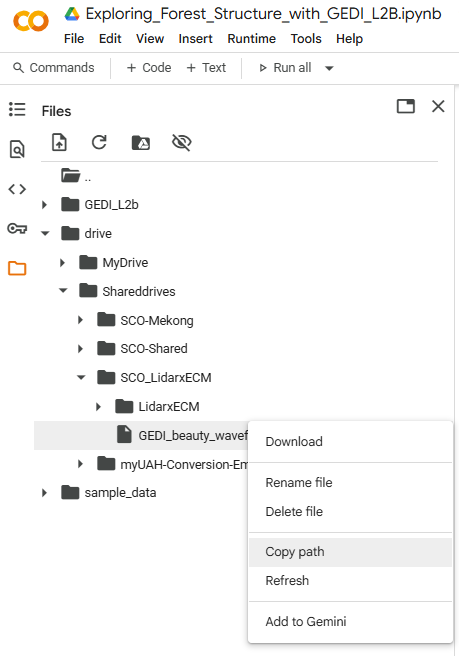


In [ ]:
# Add optional connect to drive content commented out

#### 2.2.2.b) Convert the geojsons to geodataframes and display the maps

In [206]:
# Dictionary to store loaded GeoDataFrames (key = name, value = GeoDataFrame)
geojson_gdfs = {}

# List to store rendered HTML map strings for embedding in web pages or notebooks
maps_html = []

def create_map_and_gdf(name, url):
    """
    Downloads a GeoJSON file from a given URL, converts it to a GeoDataFrame,
    calculates the centroid of the geometry using Shapely, creates an interactive
    Folium map centered on that centroid, and returns the rendered HTML for display.

    Parameters
    ---
    name : str
        A label or identifier for the dataset (used as the map layer name).
    url : str
        The URL where the GeoJSON data is hosted.

    Returns
    ---
    str
        HTML representation of the Folium map that can be rendered in Jupyter Notebooks
        or embedded into web applications.

    Side Effects
    ---
    Adds the created GeoDataFrame to the global dictionary `geojson_gdfs` with `name` as the key.
    """

    # Download GeoJSON data from the provided URL
    geojson_data = requests.get(url).json()

    # Convert the GeoJSON into a GeoDataFrame
    gdf = gp.GeoDataFrame.from_features(geojson_data["features"])
    geojson_gdfs[name] = gdf  # Store in the global dictionary for later use

    # Use Shapely to find the centroid of the first feature
    # Convert the first feature geometry into a Shapely object
    geom = shape(geojson_data['features'][0]['geometry'])
    centroid = geom.centroid
    lat, lon = centroid.y, centroid.x  # Shapely stores coordinates as (x, y) = (lon, lat)

    # Create a Folium map centered on the centroid
    fmap = folium.Map(location=[lat, lon], zoom_start=13, tiles="OpenStreetMap")

    # Add the GeoJSON layer to the map
    folium.GeoJson(geojson_data, name=name).add_to(fmap)

    # Return HTML string of the rendered map
    return fmap._repr_html_()


# Now, generate maps and GeoDataFrames for all URLs
# `geojson_urls` is a dictionary with keys = dataset names, values = GeoJSON URLs
for name, url in geojson_urls.items():
    html_map = create_map_and_gdf(name, url)
    maps_html.append(html_map)

In [207]:
# Display the maps side by side and add the aoi name to the display
html = f"""
<div style="display: flex; flex-wrap: wrap;">
    {''.join([f'''<div style="flex: 1; min-width: 400px; margin: 5px;">
            <h3 style="text-align: center; margin-bottom: 5px;">{name}</h3>
            {m}</div>''' for name, m in zip(geojson_gdfs.keys(), maps_html)])}
</div>
"""

# Display the HTML in the notebook
display(HTML(html))


In [ ]:
#Pull out the geopanda dataframes
#? If plugging in your own AOI(s), change the names here
# SPB_AOI = geojson_gdfs["SPB_AOI"] #?
# Prescribed_Burn_AOI = geojson_gdfs["Prescribed_Burn_AOI"] #?
# PaintRock_AOI = geojson_gdfs["PaintRock_AOI"] #?
# Sewanee_Domain = geojson_gdfs["Sewanee_Domain"] #?

#### 2.2.2.c) Create bounding box objects for each AOI to be used in the Harmony API data request

In [194]:
# Create a dictionary to store bounding box objects for each dataset for later use
bbox_dict = {}

for name, url in geojson_urls.items():
    # Load the GeoJSON file directly into a GeoDataFrame
    gdf = gp.read_file(url)

    # Extract bounding box coordinates: (min longitude, min latitude, max longitude, max latitude)
    minx, miny, maxx, maxy = gdf.total_bounds

    # Create a BBox object from the extracted coordinates
    bbox = BBox(minx, miny, maxx, maxy)

    # Store the BBox in the dictionary with a key formatted as "<dataset_name>_roi"
    bbox_dict[f"{name}_roi"] = bbox # the _roi suffix helps distinguish the bounding box from the imported geojsons

bbox_dict

{'SPB_AOI_roi': BBox: West:-87.41249365706668, South:34.14940566292299, East:-87.35970778365359, North:34.1864759501938,
 'Prescribed_Burn_AOI_roi': BBox: West:-86.68320982, South:30.99529573, East:-86.62706739, North:31.02423368,
 'PaintRock_AOI_roi': BBox: West:-86.31006140840377, South:34.769532701151896, East:-86.30307836070996, North:34.77524552146644,
 'Sewanee_Domain_roi': BBox: West:-85.98971714751701, South:35.127110504508586, East:-85.85727611112807, North:35.235639374867105}

### 2.2.3) Establish the temporal filter based on the application

The GEDI Mission timeline for its launch and data collection periods from the International Space Station [can be found here](https://gedi.umd.edu/mission/timeline/).

> **Important note: there are periods of no data between parts of 2023 and 2024.**

*   ✔  April 4, 2019 - March 16, 2023
*   ❌ **No data** March 16, 2023 - April 26, 2024
*   ✔  April 26, 2024 - **Present**

For this tutorial, the most relevant time periods for each AOI relate to the application and purpose of the AOI:

**Southern Pine Beetle (SPB_AOI):** The first evident beetle infestation over this area started in August 2024 and can be seen via Sentinel-2 imagery interpretation (from median composities between August 1 - September 30 for each year 2019-2024).
*   It is assumed that no beetle infestation occurred before about August 2024 (give or take a month)
*   The infected trees are expected to reflect the infestation from August 2024 and onward.



**Prescribed Burn area (Prescribed_Burn_AOI)**: This area was treated by prescribed burn on February 19, 2023.
*   It is expected that vegetation regrowth was present up until February, 2023 [CONFIRM WITH KATIE NO OTHER BURNS OR THINNING ACTIVITY IN THE AREA]
*   The burn date was February 19, 2023, lasting about x days.
*   It is expected that the burned area will have vegetation regrowth beginning within the first few months after the burn date.[CONFIRM WITH KATIE NO OTHER BURNS OR THINNING ACTIVITY IN THE AREA]



**Paint Rock conservation and research forest (PaintRock_AOI)**
*   Largely left alone. Many of tree fellings are due to storms. [CONFIRM WITH A&M]
*   2024-2025 data best aligns with high resolution lidar collected in x year by Alabama A&M researchers.


**Sewanee forest (Sewanee_Domain)**
*   Need dates of activity to help validate observations

The temporal filter should encompass the period for which your target analysis occurs, with the goal of investigating GEDI availability, capability, or sensitivity to such targets. *For example, if you are investigating plant area (which highly correlates to leaf area) in a deciduous forest experiencing seasonal leaf loss, your results could be skewed by selecting data from leaf-off time period/season.*

In [195]:
#? Define temporal range to only select GEDI data files from this time period
temporal_range = {'start': datetime(2022, 2, 1), #?
                  'stop': datetime(2022, 4, 22)} #?

### 2.2.4) Create the Harmony Request task and download spatially and temporally filtered HDF5 files

This next code block could be considered a rather manual process to configure the AOI bounding box names (established in the cells above with the suffix `_roi`) and `output_dir` (subfolder) paths. However, other looping methods create pairs based on positional matching where several variables would need to establish this data in the same exact order for each interrelated variable. Instead, explicitly naming pairs reduces errors and overall manual checks across all dependent code lines.

In [196]:
#? Define AOI configurations with explicit pairing to ensure correct matching
# The name suffix '_roi' references the AOI bounding box variable, not the geojsons.
# Be sure the 'output_dir' path matches the paths established in the previously defined variable 'output_dirs'
aoi_configs = [
    {'name': 'SPB_AOI_roi', 'output_dir': '/content/GEDI_L2b/SPB_AOI'},
    {'name': 'Prescribed_Burn_AOI_roi', 'output_dir': '/content/GEDI_L2b/Prescribed_Burn_AOI'},
    {'name': 'PaintRock_AOI_roi', 'output_dir': '/content/GEDI_L2b/PaintRock_AOI'},
    {'name': 'Sewanee_Domain_roi', 'output_dir': '/content/GEDI_L2b/Sewanee_Domain'}
]

Create the request tasks via Harmony and download each file to the respective directories in the temporary colab space.

**The AOI, time period, and GEDI data product level are used to create the request.**

In [26]:
# GEDI HDF5 DATA DOWNLOAD SCRIPT
# Downloads raw GEDI HDF5 files for multiple Areas of Interest (AOI) using Harmony API
# Supports spatial and temporal filtering with complete file downloads

# Global counters for tracking download progress across all AOIs
total_files_downloaded = 0
total_size_bytes = 0

def get_file_size(file_path):
    """
    Get the size of a file in bytes.

    Args:
        file_path (str): Path to the file to check

    Returns:
        int: File size in bytes, or 0 if file doesn't exist or cannot be accessed

    Note:
        This function handles common file access errors gracefully by returning 0
        instead of raising exceptions, allowing the download process to continue
    """
    try:
        return os.path.getsize(file_path)
    except (OSError, FileNotFoundError):
        return 0

def format_file_size(size_bytes):
    """
    Convert a file size in bytes to human-readable format.

    Args:
        size_bytes (int): File size in bytes

    Returns:
        str: Formatted file size with appropriate unit (B, KB, MB, GB, TB)

    Examples:
        format_file_size(1024) returns "1.0 KB"
        format_file_size(1048576) returns "1.0 MB"
        format_file_size(0) returns "0 B"
    """
    if size_bytes == 0:
        return "0 B"
    size_names = ["B", "KB", "MB", "GB", "TB"]
    import math
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return f"{s} {size_names[i]}"

# Display initial download information
print(f"\nStarting GEDI L2B data download...")
print(f"Temporal range: {temporal_range['start']} to {temporal_range['stop']}")
print(f"{'='*80}")

# Main download loop - process each AOI configuration sequentially
# Expected variables: aoi_configs (list of dict with 'name' and 'output_dir' keys)
for i, aoi_config in enumerate(aoi_configs):
    spatial_key = aoi_config['name']
    out_dir = aoi_config['output_dir']

    # Display download information
    print(f"\n{'='*60}")
    print(f"Downloading AOI {i+1}/{len(aoi_configs)}: {spatial_key}")
    print(f"Output directory: {out_dir}")
    print(f"{'='*60}")

    # Create main AOI directory structure
    # Each AOI gets its own directory with a raw_downloads subdirectory
    raw_download_dir = os.path.join(out_dir, "raw_downloads")
    print(f"Creating raw downloads directory: {raw_download_dir}")

    try:
        os.makedirs(raw_download_dir, exist_ok=True)
        print(f"✓ Raw downloads directory created successfully: {raw_download_dir}")

        # # Verify the directory is writable before proceeding with downloads
        # if not os.access(raw_download_dir, os.W_OK):
        #     print(f"✗ Directory not writable: {raw_download_dir}")
        #     continue

    except Exception as dir_error:
        print(f"✗ Error creating directory {raw_download_dir}: {str(dir_error)}")
        continue  # Skip this AOI if directory creation fails

    # Download complete GEDI HDF5 files using Harmony API
    try:
        # Create Harmony request for complete file download
        # No variables parameter means all variables and beams are included
        # Expected variables: concept_id, bbox_dict, temporal_range
        request = Request(
            collection=Collection(id=concept_id),
            spatial=bbox_dict[spatial_key],
            temporal=temporal_range
        )

        print(f"Request validation: {request.is_valid()}")

        if request.is_valid():
            # Submit the request for complete files
            # Expected variable: harmony_client (initialized Harmony client)
            print(f"Submitting Harmony request for complete files...")
            task = harmony_client.submit(request)
            print(f"Harmony request ID: {task}")

            # Process the request with progress tracking
            # This step waits for Harmony to prepare the files for download
            print(f"Processing Harmony request...")
            task_json = harmony_client.result_json(task, show_progress=True)

            # Download all files from the completed Harmony job
            # Files are saved to raw_download_dir with overwrite enabled
            print(f"Downloading complete files to {raw_download_dir}...")
            results = harmony_client.download_all(task, directory=raw_download_dir, overwrite=True)
            file_names = [f.result() for f in results]

            # Calculate download statistics for this AOI (number of files and size counts)
            raw_files_count = len(file_names)
            raw_size_bytes = 0

            # Sum the file sizes for this AOI
            for file_path in file_names:
                file_size = get_file_size(file_path)
                raw_size_bytes += file_size

            # Update global download counters
            total_files_downloaded += raw_files_count
            total_size_bytes += raw_size_bytes

            # Display AOI-specific download results
            print(f"✓ Raw download completed")
            print(f"  Files downloaded: {raw_files_count}")
            print(f"  Size: {format_file_size(raw_size_bytes)}")
            print(f"  Running totals - Files: {total_files_downloaded}, Size: {format_file_size(total_size_bytes)}")

        else:
            print(f"✗ Request validation failed for {spatial_key}")

    except Exception as harmony_error:
        # Handle Harmony API errors and continue to the next AOI
        print(f"✗ Harmony processing error for {spatial_key}:")
        print(f"  Error: {str(harmony_error)}")
        print(f"  Error type: {type(harmony_error).__name__}")
        import traceback
        traceback.print_exc()
        continue  # Continue with next AOI even if one fails

# Display comprehensive download summary
print(f"\n{'='*80}")
print(f" DOWNLOAD SUMMARY:")
print(f"   • Total AOIs processed: {len(aoi_configs)}")
print(f"   • Total requests submitted: {len(aoi_configs)}")
print(f"   • Total raw files downloaded: {total_files_downloaded}")
print(f"   • Total data size: {format_file_size(total_size_bytes)}")
print(f"   • Average files per AOI: {total_files_downloaded / len(aoi_configs):.1f}")
print(f"   • Average size per file: {format_file_size(total_size_bytes / max(total_files_downloaded, 1))}")
print(f"{'='*80}")

print(f"\n DOWNLOAD DIRECTORY STRUCTURE:")
for aoi_config in aoi_configs:
    aoi_name = aoi_config['name']
    aoi_dir = aoi_config['output_dir']
    print(f"   {aoi_name}/")

    # Check raw downloads
    raw_dir = os.path.join(aoi_dir, "raw_downloads")
    try:
        raw_files = len([f for f in os.listdir(raw_dir) if os.path.isfile(os.path.join(raw_dir, f))])
        raw_size = sum(get_file_size(os.path.join(raw_dir, f)) for f in os.listdir(raw_dir) if os.path.isfile(os.path.join(raw_dir, f)))
        print(f"     └── raw_downloads/ ({raw_files} complete files, {format_file_size(raw_size)})")
    except OSError:
        print(f"     └── raw_downloads/ (directory not accessible)")

Print("✓ HARMONY DOWNLOAD COMPLETE")


Starting GEDI L2B data download...
Temporal range: 2022-02-01 00:00:00 to 2022-04-22 00:00:00

Output directory: /content/GEDI_L2b/SPB_AOI
Creating raw downloads directory: /content/GEDI_L2b/SPB_AOI/raw_downloads
✓ Raw downloads directory created successfully: /content/GEDI_L2b/SPB_AOI/raw_downloads
Request validation: True
Submitting Harmony request for complete files...
Harmony request ID: a176b5e7-0704-4343-9d24-682ae5fc3767
Processing Harmony request...


 [ Processing: 100% ] |###################################################| [|]


/content/GEDI_L2b/SPB_AOI/raw_downloads/107185012_GEDI02_B_2022093011111_O18721_03_T01627_02_003_01_V002_subsetted.h5
/content/GEDI_L2b/SPB_AOI/raw_downloads/107185009_GEDI02_B_2022042210253_O17943_03_T02897_02_003_01_V002_subsetted.h5
✓ Raw download completed
  Files downloaded: 2
  Size: 89.48 MB
  Running totals - Files: 2, Size: 89.48 MB

Output directory: /content/GEDI_L2b/Prescribed_Burn_AOI
Creating raw downloads directory: /content/GEDI_L2b/Prescribed_Burn_AOI/raw_downloads
✓ Raw downloads directory created successfully: /content/GEDI_L2b/Prescribed_Burn_AOI/raw_downloads
Request validation: True
Submitting Harmony request for complete files...
Harmony request ID: 0254e908-24fc-456b-abc3-6079c64efcb6
Processing Harmony request...


 [ Processing: 100% ] |###################################################| [|]



There is no file to download.

Job status is successful with message: The job succeeded with 3 warnings. See the warnings field of the job status page for more details..


✓ Raw download completed
  Files downloaded: 0
  Size: 0 B
  Running totals - Files: 2, Size: 89.48 MB

Output directory: /content/GEDI_L2b/PaintRock_AOI
Creating raw downloads directory: /content/GEDI_L2b/PaintRock_AOI/raw_downloads
✓ Raw downloads directory created successfully: /content/GEDI_L2b/PaintRock_AOI/raw_downloads
Request validation: True
Submitting Harmony request for complete files...
Harmony request ID: 4ba81d1b-c6dc-431e-9a87-57d68338c8ee
Processing Harmony request...


 [ Processing: 100% ] |###################################################| [|]



There is no file to download.

Job status is successful with message: The job succeeded with 2 warnings. See the warnings field of the job status page for more details..


✓ Raw download completed
  Files downloaded: 0
  Size: 0 B
  Running totals - Files: 2, Size: 89.48 MB

Output directory: /content/GEDI_L2b/Sewanee_Domain
Creating raw downloads directory: /content/GEDI_L2b/Sewanee_Domain/raw_downloads
✓ Raw downloads directory created successfully: /content/GEDI_L2b/Sewanee_Domain/raw_downloads
Request validation: True
Submitting Harmony request for complete files...
Harmony request ID: 264b7e3a-62de-4b98-bfe6-b5c90e6afb6d
Processing Harmony request...


 [ Processing: 100% ] |###################################################| [|]


/content/GEDI_L2b/Sewanee_Domain/raw_downloads/107185025_GEDI02_B_2022068034341_O18335_02_T00995_02_003_01_V002_subsetted.h5
/content/GEDI_L2b/Sewanee_Domain/raw_downloads/107185024_GEDI02_B_2022062130418_O18248_03_T10425_02_003_01_V002_subsetted.h5
/content/GEDI_L2b/Sewanee_Domain/raw_downloads/107185026_GEDI02_B_2022110105831_O18991_02_T02571_02_003_01_V002_subsetted.h5
✓ Raw download completed
  Files downloaded: 3
  Size: 196.73 MB
  Running totals - Files: 5, Size: 286.21 MB

 DOWNLOAD SUMMARY:
   • Total AOIs processed: 4
   • Total requests submitted: 4
   • Total raw files downloaded: 5
   • Total data size: 286.21 MB
   • Average files per AOI: 1.2
   • Average size per file: 57.24 MB

 DOWNLOAD DIRECTORY STRUCTURE:
   SPB_AOI_roi/
     └── raw_downloads/ (2 complete files, 89.48 MB)
   Prescribed_Burn_AOI_roi/
     └── raw_downloads/ (0 complete files, 0 B)
   PaintRock_AOI_roi/
     └── raw_downloads/ (0 complete files, 0 B)
   Sewanee_Domain_roi/
     └── raw_downloads/ (3 



---


# Step 3) Subset the desired GEDI variables from the downloaded files and convert the data to GeoDataFrames and CSVs

## Tutorial Overview
<ol>
  <li>Setup your environment and directories</li>
  <li>Access, filter and download the raw GEDI HDF5 files:
    <ol type="a">
      <li>Authenticate your EarthData Access login</li>
      <li>Create the Harmony API data product, spatial, and temporal request parameters and download the files</li>
    </ol>
  </li>
  <li><strong>Subset the desired GEDI variables and convert the data to GeoDataFrame and CSV formats</strong></li>
  </li>
  <li>Explore data quality filtering techniques</li>
  </li>
  <li>Generate the final filtered dataset</li>
  </li>
  <li>Plot and explore the data</li>
  </li>
  </li>
  <li>Evaluate GEDI against other LiDAR data</li>
  </li>
</ol>

## 3.1) Subset GEDI by selected variables

The NASA data centers (DAACs) host data product dictionaries with all the necessary formatting, metadata, datatype, unit, and general description information. The exact label is listed for navigating the datasets in each data file.

Take time to explore GEDI variables of importance via the [GEDI L2B dictionary](https://lpdaac.usgs.gov/documents/980/gedi_l2b_dictionary_P003_v2.html).

In [202]:
# See the append_field.txt url link. This is a long dictionary of the fields and products of GEDI.
# This dictionary will be used to create the list of variables that will be used to subset the downloaded files.
# Notice this includes'GEDI01_B','GEDI02_A','GEDI02_B', and 'GEDI04_A'
#? Link to or duplicate this dictionary in your own github or file space to access.
#? If you are accessing GEDI products that are not 1B, 2A, 2B, or 4A, you will need to update the txt file with the corresponding dictionary items.

# Fetch and parse dictionary from remote text file
append_url = "https://raw.githubusercontent.com/SERVIR/GEDI_Earthhub_ARSET_Training/main/append_field.txt"
append_text = requests.get(append_url).text

# Extract dictionary string from text content
start_index = append_text.find("{")
end_index = append_text.rfind("}") + 1
dict_str = append_text[start_index:end_index]

# Convert string representation to actual dictionary object
append_dict = eval(dict_str)

#Display the dictionary we will use to subset later
append_dict

{'GEDI_L1B': ['geolocation/altitude_instrument',
  'geolocation/local_beam_elevation',
  'tx_sample_start_index',
  'nsemean_odd',
  'ancillary/master_time_epoch',
  'noise_stddev_corrected',
  'tx_pulseflag',
  'geolocation/longitude_bin0_error',
  'selection_stretchers_x',
  'nsemean_even',
  'geolocation/latitude_instrument',
  'geolocation/digital_elevation_model',
  'geolocation/longitude_instrument_error',
  'geolocation/longitude_lastbin_error',
  'tx_egsigma',
  'geolocation/neutat_delay_total_bin0',
  'rx_energy',
  'master_frac',
  'rx_sample_count',
  'rxwaveform',
  'tx_gloc',
  'ancillary/mean_samples',
  'geolocation/longitude_instrument',
  'tx_eggamma_error',
  'rx_offset',
  'tx_egbias_error',
  'geolocation/bounce_time_offset_lastbin',
  'all_samples_sum',
  'geophys_corr/tide_load',
  'geolocation/solar_azimuth',
  'geolocation/mean_sea_surface',
  'geolocation/neutat_delay_total_lastbin',
  'th_left_used',
  'rx_sample_start_index',
  'geophys_corr/tide_ocean',
  'g

The prefixes such as 'geolocation/', 'rx_processing/', 'land_cover_data/' are examples of where that dataset is located in the HDF5 group structure as summarized in the product dictionary. Each GEDI product level has its own unique set of groups, datasets, and formats, though some datasets are in fact shared/replicated across the product levels. Refer to the product data dictionaries for more details.

In [201]:
# Print only the dictionary of available the desired product to explore
#? If selecting for a different product, change the variable name and dictionary key
level = 'GEDI_L2B'
gedi_product_level = append_dict.get(level, {}) #?

print("Items under" + level) #?
# Iterate over every item in the dictionary to print
for item in gedi_product_level: #?
    print(item)

Items underGEDI_L2B
rx_processing/rg_eg_flag_a4
rx_processing/rg_eg_gamma_error_a5
rx_processing/rg_eg_gamma_error_a1
rx_processing/rg_error_a3
rx_processing/rg_eg_amplitude_a2
geolocation/local_beam_elevation
ancillary/rg_eg_constraint_center_buffer
rx_processing/rx_energy_a6
ancillary/tx_noise_stddev_multiplier
pgap_theta_z
rx_processing/rg_eg_center_error_a5
rx_processing/pgap_theta_a4
land_cover_data/modis_nonvegetated
geolocation/longitude_bin0_error
rx_processing/rg_error_a1
geolocation/elev_highestreturn
land_cover_data/landsat_water_persistence
land_cover_data/leaf_on_doy
rx_processing/algorithmrun_flag_a5
geolocation/lon_lowestmode
rx_processing/rx_energy_a4
geolocation/digital_elevation_model
rhov
rx_processing/rg_a5
rx_processing/rg_error_a2
geolocation/longitude_lastbin_error
rx_processing/rg_a6
rx_processing/rg_eg_gamma_a1
l2b_quality_flag
rx_processing/rg_eg_amplitude_error_a4
rx_processing/rg_eg_amplitude_a3
rx_processing/pgap_theta_error_a3
land_cover_data/leaf_off_flag

### 3.1.1) Select the variables of interest

In [90]:
# List the variables of interest
# Warning: potential time-out or long waiting times for larger AOIs or amounts of data to subset.

#? Update the list of variables when using different product levels.
subset_vars = ['geolocation/lat_lowestmode', 'geolocation/lon_lowestmode',
              'geolocation/solar_elevation',
              'geolocation/local_beam_elevation',
              'selected_l2a_algorithm',
              'geolocation/degrade_flag', 'l2b_quality_flag',
              'geolocation/digital_elevation_model','geolocation/elev_lowestmode',
              'geolocation/elev_highestreturn', 'rh100',
              'shot_number',
              'num_detectedmodes', 'sensitivity',
              'land_cover_data/leaf_off_flag',
              'pgap_theta_z', 'pai', 'pai_z', 'fhd_normal', 'pavd_z', 'cover', 'cover_z']

In [93]:
# Define function to get the selected variable paths from the product level dictionary list.
# These paths help execute the variables search in the HDF5 file

def create_variable_selection(subset_vars, gedi_variables):
    """
    Args:
        subset_vars: List of desired variable patterns
        gedi_variables: List of all available variables in the selected GEDI product level

    Returns:
        List of selected variables
    """
    selected = []

    for s in subset_vars:
        # Find all variables ending with current subset variable name
        my_var = [v for v in gedi_variables if v.endswith(f'{s}')]

        # If exactly one match, add it directly
        if len(my_var) == 1:
            selected.append(my_var[0])

        # If multiple matches, further filter by variables that start with the subset name
        elif len(my_var) > 1:
            my_var = [v for v in my_var if v.startswith(f'{s}')]

            # Add unique variables to selected list
            for l in my_var:
                if l not in selected:
                    selected.append(l)
    return selected

### 3.1.2) Select the beams of interest

**Ensure the desired beams are included in the subset**

Depending on the application, using only the power or coverage beams may be a pre-established recommendation.

**Coverage:** `'BEAM0000','BEAM0001', 'BEAM0010', 'BEAM0011'`

**Power:** `'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011'`

This tutorial investigates all 8 available beams.

In [91]:
# Depending on the application, power or coverage may be a pre-established recommendation.
#? Replace with either the power or coverage only beam configurations, or create your own configuration.

# Define selected beams
#select_beams = ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']  # power beams only
#select_beams = ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011']  # coverage beams only
select_beams = ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011'] # all 8 beams

### 3.1.3) Execute subsetting the HDF5 files

In [101]:
# Define functions for the file subsetting process and tracking

def get_file_size(file_path):
    """Get file size in bytes, returns 0 if file doesn't exist or an error occurs"""
    try:
        return os.path.getsize(file_path)
    except (OSError, FileNotFoundError):
        return 0

def format_file_size(size_bytes):
    """Convert bytes to readable format (B, KB, MB, GB, TB)"""
    if size_bytes == 0:
        return "0 B"
    size_names = ["B", "KB", "MB", "GB", "TB"]
    import math
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return f"{s} {size_names[i]}"

def get_available_variables_in_file(input_file, selected_beams, selected_variables):
    """
    Pre-scan file to determine which variables exist in which beams.
    This reduces repeated file access and improves performance.
    """
    available_vars = {}
    try:
        with h5py.File(input_file, 'r') as f:
            for beam in selected_beams:
                if beam in f:
                    beam_vars = []
                    for var in selected_variables:
                        if var in f[beam]:
                            beam_vars.append(var)
                    available_vars[beam] = beam_vars
                else:
                    available_vars[beam] = []
    except Exception as e:
        print(f"    ⚠️ Error scanning file structure: {e}")
        # Return empty dict if scanning fails
        available_vars = {beam: [] for beam in selected_beams}

    return available_vars

def copy_dataset(src_dataset, dst_group, var_name):
    try:
        dst_dataset = dst_group.create_dataset(
            var_name,
            data=src_dataset[...],
            compression=src_dataset.compression,
            compression_opts=src_dataset.compression_opts,
            shuffle=src_dataset.shuffle,
            fletcher32=src_dataset.fletcher32
        )

        # Copy attributes
        for attr_name, attr_value in src_dataset.attrs.items():
            dst_dataset.attrs[attr_name] = attr_value

        return True

    except Exception as e:
        print(f"      ✗ Error copying dataset {var_name}: {e}")
        return False

def copy_group_recursively(src_group, dst_group, group_name=""):
    copied_items = 0
    try:
        for attr_name, attr_value in src_group.attrs.items():
            dst_group.attrs[attr_name] = attr_value

        for key in src_group.keys():
            src_item = src_group[key]
            try:
                if isinstance(src_item, h5py.Dataset):
                    if copy_dataset(src_item, dst_group, key):
                        copied_items += 1
                elif isinstance(src_item, h5py.Group):
                    dst_subgroup = dst_group.create_group(key)
                    for attr_name, attr_value in src_item.attrs.items():
                        dst_subgroup.attrs[attr_name] = attr_value
                    sub_items = copy_group_recursively(
                        src_item, dst_subgroup, f"{group_name}/{key}"
                    )
                    copied_items += sub_items
            except Exception as e:
                print(f"      ⚠️ Error copying item {key}: {e}")
                continue
    except Exception as e:
        print(f"    ⚠️ Error in group copying: {e}")

    return copied_items

# Main subsetting funtion
def subset_hdf5_file(input_file, output_file, selected_beams, selected_variables):
    """
    Args:
        input_file (str): Path to input HDF5 file
        output_file (str): Path to output subset HDF5 file
        selected_beams (list): Beam names to include
        selected_variables (list): Variable names to include (without beam prefix)

    Returns:
        bool: True if successful, False if an error occurred
    """

    try:
        # Pre-scan file to get available variables per beam
        print(f"     Scanning file structure...")
        available_vars = get_available_variables_in_file(input_file, selected_beams, selected_variables)

        # Check if any variables are available
        total_available = sum(len(vars_list) for vars_list in available_vars.values())
        if total_available == 0:
            print(f"    ⚠️ No selected variables found in any beam")
            return False

        print(f"     Found {total_available} variable instances across {len(available_vars)} beams")

        with h5py.File(input_file, 'r') as src_f, h5py.File(output_file, 'w') as dst_f:

            # Copy root-level attributes
            for attr_name, attr_value in src_f.attrs.items():
                dst_f.attrs[attr_name] = attr_value

            # Copy global metadata groups (non-beam specific data)
            global_groups = [k for k in src_f.keys() if not k.startswith("BEAM")]
            for group_name in global_groups:
                print(f"       Copying global group: {group_name}")
                try:
                    src_f.copy(group_name, dst_f)
                except Exception as e:
                    print(f"      ⚠️ Warning: Could not copy global group {group_name}: {e}")

            # Process only selected beams with available variables
            beams_processed = 0
            total_variables_copied = 0

            for beam in selected_beams:
                beam_vars_available = available_vars.get(beam, [])

                if not beam_vars_available:
                    print(f"      ⚠️ {beam}: No selected variables available, skipping")
                    continue

                if beam not in src_f:
                    print(f"      ⚠️ {beam}: Beam not found in file, skipping")
                    continue

                print(f"       Processing {beam} ({len(beam_vars_available)} variables)...")

                # Create beam group in output file
                dst_beam_group = dst_f.create_group(beam)
                src_beam = src_f[beam]

                # Copy beam-level attributes
                for attr_name, attr_value in src_beam.attrs.items():
                    dst_beam_group.attrs[attr_name] = attr_value

                # Copy only available variables for this beam
                variables_copied = 0
                for var in beam_vars_available:
                    try:
                        obj = src_beam[var]

                        if isinstance(obj, h5py.Dataset):
                            if copy_dataset(obj, dst_beam_group, var):
                                variables_copied += 1

                        elif isinstance(obj, h5py.Group):
                            dst_var_group = dst_beam_group.create_group(var)
                            # Copy group-level attributes
                            for attr_name, attr_value in obj.attrs.items():
                                dst_var_group.attrs[attr_name] = attr_value
                            # Recursively copy all items in the group
                            items_in_group = copy_group_recursively_improved(
                                obj, dst_var_group, var
                            )
                            if items_in_group > 0:
                                variables_copied += 1
                                print(f"        ✓ Copied group {var} with {items_in_group} items")

                    except Exception as e:
                        print(f"        ✗ Error copying variable {var}: {e}")
                        continue

                beams_processed += 1
                total_variables_copied += variables_copied
                print(f"        ✓ {beam}: copied {variables_copied}/{len(beam_vars_available)} available variables")

        print(f"    ✅ Created subset file: {os.path.basename(output_file)}")
        print(f"       {beams_processed} beams, {total_variables_copied} total variables copied")

        return True

    except Exception as e:
        print(f"    ✗ Error subsetting {os.path.basename(input_file)}: {e}")

In [102]:
# Define the function that subsets the files for each AOI
def process_aoi_directory(aoi_config, subset_configs):
    """
    Args:
        aoi_config (dict): AOI configuration containing 'name' and 'output_dir'
        subset_configs (list): List of subset configurations with 'name', 'variables', and 'beams'
    """
    aoi_name = aoi_config['name']
    raw_download_dir = os.path.join(aoi_config['output_dir'], "raw_downloads")

    print(f"\n{'='*70}")
    print(f" Processing subsets for AOI: {aoi_name}")
    print(f" Raw downloads directory: {raw_download_dir}")
    print(f"{'='*70}")

    # Find all HDF5 files to process
    downloaded_files = [f for f in os.listdir(raw_download_dir)
                       if f.endswith(('.h5')) and os.path.isfile(os.path.join(raw_download_dir, f))]

    if not downloaded_files:
        print(f"⚠️ No HDF5 files found in {raw_download_dir}")
        return

    print(f" Found {len(downloaded_files)} files to process")

    # Process each subset configuration
    for subset_config in subset_configs:
        subset_name = subset_config['name']
        subset_variables = subset_config['variables']
        subset_beams = subset_config.get('beams', select_beams)

        print(f"\n  Creating {subset_name} subset...")
        print(f"    Variables: {len(subset_variables)} variables")
        print(f"    Beams: {len(subset_beams)} beams")
        print(f"    First 5 variables: {', '.join(subset_variables[:5])}{'...' if len(subset_variables) > 5 else ''}")

        # Create subset output directory
        aoi_base_dir = aoi_config['output_dir']
        subset_dir = os.path.join(aoi_base_dir, f"{subset_name}_subset")
        os.makedirs(subset_dir, exist_ok=True)

        # Track processing statistics
        files_processed = 0
        files_failed = 0
        total_subset_size = 0

        # Process each downloaded file
        for i, filename in enumerate(downloaded_files, 1):
            input_path = os.path.join(raw_download_dir, filename)
            output_filename = f"{subset_name}_{filename}"
            output_path = os.path.join(subset_dir, output_filename)

            print(f"  📄 Processing [{i}/{len(downloaded_files)}]: {filename}")

            # Create subset file with variable filtering
            success = subset_hdf5_file(input_path, output_path, subset_beams, subset_variables)

            if success:
                files_processed += 1
                subset_size = get_file_size(output_path)
                total_subset_size += subset_size
                original_size = get_file_size(input_path)
                reduction = (1 - subset_size/max(original_size, 1)) * 100
                print(f"    ✅ → {output_filename}")
                print(f"        Size: {format_file_size(subset_size)} ({reduction:.1f}% reduction)")
            else:
                files_failed += 1
                print(f"    ❌ Failed to process {filename}")

        # Print subset completion summary
        print(f"\n   {subset_name} subset completed:")
        print(f"     Files processed: {files_processed}")
        print(f"    ❌ Files failed: {files_failed}")
        print(f"     Total files: {len(downloaded_files)}")
        print(f"     Total subset size: {format_file_size(total_subset_size)}")
        print(f" Processing complete!")

In [103]:
# Execute the functions to subset the raw downloaded HDF5 files

# Create the paths between the selected variables for the product level to be found under the selected BEAM groups
selected = create_variable_selection(subset_vars, gedi_product_level)
print(f"Selected {len(selected)} variables from {len(subset_vars)} patterns")

# Configure subsets to process
subsets_to_process = [
    {
        'name': 'Variables_selected',
        'variables': selected,  # Use variable names without beam prefixes
        'beams': select_beams   # Specify which beams to include
    }
]

# Process all AOIs
print(f" Starting IMPROVED GEDI L2B Variable Subsetting Process...")
print(f" Settings: {len(subset_vars)} variable patterns, {len(select_beams)} beams")

for aoi_config in aoi_configs:
    process_aoi_directory(aoi_config, subsets_to_process)

Selected 22 variables from 22 patterns
🚀 Starting IMPROVED GEDI L2B Variable Subsetting Process...
⚙️ Settings: 22 variable patterns, 8 beams

 Processing subsets for AOI: SPB_AOI_roi
 Raw downloads directory: /content/GEDI_L2b/SPB_AOI/raw_downloads
 Found 2 files to process

  Creating Variables_selected subset...
    Variables: 22 variables
    Beams: 8 beams
    First 5 variables: geolocation/lat_lowestmode, geolocation/lon_lowestmode, geolocation/solar_elevation, geolocation/local_beam_elevation, selected_l2a_algorithm...
  📄 Processing [1/2]: 107185009_GEDI02_B_2022042210253_O17943_03_T02897_02_003_01_V002_subsetted.h5
     Scanning file structure...
     Found 176 variable instances across 8 beams
       Copying global group: METADATA
       Processing BEAM0000 (22 variables)...
        ✓ BEAM0000: copied 22/22 available variables
       Processing BEAM0001 (22 variables)...
        ✓ BEAM0001: copied 22/22 available variables
       Processing BEAM0010 (22 variables)...
        

In [120]:
# Confirm the files are in the right locations
!find /content/GEDI_L2b

/content/GEDI_L2b
/content/GEDI_L2b/PaintRock_AOI
/content/GEDI_L2b/PaintRock_AOI/raw_downloads
/content/GEDI_L2b/Prescribed_Burn_AOI
/content/GEDI_L2b/Prescribed_Burn_AOI/raw_downloads
/content/GEDI_L2b/SPB_AOI
/content/GEDI_L2b/SPB_AOI/raw_downloads
/content/GEDI_L2b/SPB_AOI/raw_downloads/107185009_GEDI02_B_2022042210253_O17943_03_T02897_02_003_01_V002_subsetted.h5
/content/GEDI_L2b/SPB_AOI/raw_downloads/107185012_GEDI02_B_2022093011111_O18721_03_T01627_02_003_01_V002_subsetted.h5
/content/GEDI_L2b/SPB_AOI/.ipynb_checkpoints
/content/GEDI_L2b/SPB_AOI/Variables_selected_subset
/content/GEDI_L2b/SPB_AOI/Variables_selected_subset/Variables_selected_107185012_GEDI02_B_2022093011111_O18721_03_T01627_02_003_01_V002_subsetted.h5
/content/GEDI_L2b/SPB_AOI/Variables_selected_subset/Variables_selected_107185009_GEDI02_B_2022042210253_O17943_03_T02897_02_003_01_V002_subsetted.h5
/content/GEDI_L2b/SPB_AOI/Variables_selected_subset/SPB_AOI_Variables_selected_subset_GEDI_L2B.csv
/content/GEDI_L2b/

#### Optional: Delete the raw data files to free up space

In [165]:
# OPTIONAL: Clean raw downloads folder
"""
Purpose:
    Removes raw_downloads folders from each Area of Interest (AOI) directory
    to free up disk space after processing is complete.

Usage:
    1. Set AUTO_CLEANUP = True to run automatically

Requirements:
    - aoi_configs variable must be defined with AOI configuration data
    - Each AOI config must have 'name' and 'output_dir' keys
"""
import shutil

def get_folder_size(folder_path):
    """
    Calculate total size of folder in bytes including all subdirectories.

    Args:
        folder_path (str): Path to folder to measure

    Returns:
        int: Total size in bytes, 0 if folder doesn't exist or errors occur
    """
    total_size = 0
    try:
        for dirpath, dirnames, filenames in os.walk(folder_path):
            for filename in filenames:
                filepath = os.path.join(dirpath, filename)
                try:
                    total_size += os.path.getsize(filepath)
                except (OSError, FileNotFoundError):
                    pass
    except (OSError, FileNotFoundError):
        pass
    return total_size

def format_file_size(size_bytes):
    """
    Convert bytes to human readable format (B, KB, MB, GB, TB).

    Args:
        size_bytes (int): Size in bytes

    Returns:
        str: Formatted size string (e.g., "1.5 GB", "256 MB")
    """
    if size_bytes == 0:
        return "0 B"
    size_names = ["B", "KB", "MB", "GB", "TB"]
    import math
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return f"{s} {size_names[i]}"

def cleanup_raw_downloads():
    """
    Delete raw_downloads folders for all AOIs defined in aoi_configs.

    This function iterates through each AOI configuration, locates the
    raw_downloads folder within each AOI's output directory, calculates
    the folder size for reporting, and permanently deletes the entire
    folder using shutil.rmtree().

    Global Variables Required:
        aoi_configs (list): List of dictionaries with 'name' and 'output_dir' keys

    Returns:
        None
    """

    total_folders_deleted = 0
    total_space_freed = 0

    for aoi_config in aoi_configs:
        aoi_name = aoi_config['name']
        raw_dir = os.path.join(aoi_config['output_dir'], "raw_downloads")

        if os.path.exists(raw_dir):
            print(f"\n   Processing AOI: {aoi_name}")

            # Calculate folder size before deletion
            folder_size = get_folder_size(raw_dir)

            try:
                shutil.rmtree(raw_dir)
                print(f"     ✓ Deleted raw_downloads folder")
                print(f"       Space freed: {format_file_size(folder_size)}")

                total_folders_deleted += 1
                total_space_freed += folder_size

            except OSError as e:
                print(f"     ✗ Failed to delete raw_downloads: {str(e)}")
        else:
            print(f"\n   AOI: {aoi_name}")
            print(f"     No raw_downloads folder found")

    # Summary
    print(f"\n{'='*60}")
    print(f"   • Raw download folders deleted: {total_folders_deleted}")
    print(f"   • Total space freed: {format_file_size(total_space_freed)}")
    print(f"{'='*60}")

# ============================================================================
# CLEANUP EXECUTION
# ============================================================================

# Configuration for cleanup behavior
AUTO_CLEANUP = False  # Set to True to automatically cleanup raw files

if AUTO_CLEANUP:
    print(f"\n AUTO_CLEANUP enabled - proceeding with cleanup...")
    cleanup_raw_downloads()
    print("Confirm the files are in the right locations after deletion")
    !find /content/GEDI_L2b
else:
    print(f"   1. Set AUTO_CLEANUP = True above and re-run this cell")


 AUTO_CLEANUP enabled - proceeding with cleanup...

   AOI: SPB_AOI_roi
     No raw_downloads folder found

   AOI: Prescribed_Burn_AOI_roi
     No raw_downloads folder found

   AOI: PaintRock_AOI_roi
     No raw_downloads folder found

   AOI: Sewanee_Domain_roi
     No raw_downloads folder found

   • Raw download folders deleted: 0
   • Total space freed: 0 B
Confirm the files are in the right locations after deletion
/content/GEDI_L2b
/content/GEDI_L2b/PaintRock_AOI
/content/GEDI_L2b/Prescribed_Burn_AOI
/content/GEDI_L2b/SPB_AOI
/content/GEDI_L2b/SPB_AOI/.ipynb_checkpoints
/content/GEDI_L2b/SPB_AOI/Variables_selected_subset
/content/GEDI_L2b/SPB_AOI/Variables_selected_subset/.ipynb_checkpoints
/content/GEDI_L2b/SPB_AOI/Variables_selected_subset/Variables_selected_107185012_GEDI02_B_2022093011111_O18721_03_T01627_02_003_01_V002_subsetted.h5
/content/GEDI_L2b/SPB_AOI/Variables_selected_subset/Variables_selected_107185009_GEDI02_B_2022042210253_O17943_03_T02897_02_003_01_V002_subset

## 3.2) Explore one of the files

### 3.2.1) Check the GEDI datasets found in the raw and subsetted files

**Check the raw file**

In [123]:
# Directory containing the HDF5 files
folder_path = '/content/GEDI_L2b/Sewanee_Domain/raw_downloads'

#? Uncomment the next 4 lines to get the first .h5 file in the directory
# files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
# if not files:
#     raise FileNotFoundError("No .h5 files found in the directory.")
# first_file_path = os.path.join(folder_path, files[0])

# Alternatively, view a specific file (? comment if viewing the first file instead)
first_file_path = os.path.join('/content/GEDI_L2b/Sewanee_Domain/raw_downloads/107185025_GEDI02_B_2022068034341_O18335_02_T00995_02_003_01_V002_subsetted.h5')
print(f"Using file: {first_file_path}")

# The file is opened in read-only mode ('r'), so no data will be modified.
with h5py.File(first_file_path, 'r') as f:

    # Display the top-level groups in the file
    # These are the main datasets or groups stored at the root level.
    print("\nTop-level groups:")
    print(list(f.keys()))

    # Identify and display all available beams
    print("\nAvailable beams:")
    beams_found = [k for k in f.keys() if k.startswith("BEAM")]
    print(beams_found)

    # For each beam found, list the variables contained inside it
    # Each beam may contain multiple datasets, subgroups, or attributes.
    for beam in beams_found:
        print(f"\nVariables in {beam}:")
        print(list(f[beam].keys()))


Using file: /content/GEDI_L2b/Sewanee_Domain/raw_downloads/107185025_GEDI02_B_2022068034341_O18335_02_T00995_02_003_01_V002_subsetted.h5

Top-level groups:
['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011', 'METADATA']

Available beams:
['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

Variables in BEAM0000:
['algorithmrun_flag', 'ancillary', 'beam', 'channel', 'cover', 'cover_z', 'delta_time', 'fhd_normal', 'geolocation', 'l2a_quality_flag', 'l2b_quality_flag', 'land_cover_data', 'master_frac', 'master_int', 'num_detectedmodes', 'omega', 'pai', 'pai_z', 'pavd_z', 'pgap_theta', 'pgap_theta_error', 'pgap_theta_z', 'rg', 'rh100', 'rhog', 'rhog_error', 'rhov', 'rhov_error', 'rossg', 'rv', 'rx_processing', 'rx_range_highestreturn', 'rx_sample_count', 'rx_sample_start_index', 'selected_l2a_algorithm', 'selected_mode', 'selected_mode_flag', 'selected_rg_algorithm', 'sensitivity', 'shot_number', 'sta

**Check the subsetted file for the same data**

In [124]:
# Directory containing the HDF5 files
folder_path = '/content/GEDI_L2b/Sewanee_Domain/Variables_selected_subset'

#? Uncomment the next 4 lines to get the first .h5 file in the directory
# files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
# if not files:
#     raise FileNotFoundError("No .h5 files found in the directory.")
# first_file_path = os.path.join(folder_path, files[0])

# Alternatively, view a specific file (? comment if viewing the first file instead)
first_file_path = os.path.join('/content/GEDI_L2b/Sewanee_Domain/Variables_selected_subset/Variables_selected_107185025_GEDI02_B_2022068034341_O18335_02_T00995_02_003_01_V002_subsetted.h5')
print(f"Using file: {first_file_path}")

# The file is opened in read-only mode ('r'), so no data will be modified.
with h5py.File(first_file_path, 'r') as f:

    # Display the top-level groups in the file
    # These are the main datasets or groups stored at the root level.
    print("\nTop-level groups:")
    print(list(f.keys()))

    # Identify and display all available beams
    print("\nAvailable beams:")
    beams_found = [k for k in f.keys() if k.startswith("BEAM")]
    print(beams_found)

    # For each beam found, list the variables contained inside it
    # Each beam may contain multiple datasets, subgroups, or attributes.
    for beam in beams_found:
        print(f"\nVariables in {beam}:")
        print(list(f[beam].keys()))

Using file: /content/GEDI_L2b/Sewanee_Domain/Variables_selected_subset/Variables_selected_107185025_GEDI02_B_2022068034341_O18335_02_T00995_02_003_01_V002_subsetted.h5

Top-level groups:
['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011', 'METADATA']

Available beams:
['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

Variables in BEAM0000:
['cover', 'cover_z', 'fhd_normal', 'geolocation', 'l2b_quality_flag', 'land_cover_data', 'num_detectedmodes', 'pai', 'pai_z', 'pavd_z', 'pgap_theta_z', 'rh100', 'selected_l2a_algorithm', 'sensitivity', 'shot_number']

Variables in BEAM0001:
['cover', 'cover_z', 'fhd_normal', 'geolocation', 'l2b_quality_flag', 'land_cover_data', 'num_detectedmodes', 'pai', 'pai_z', 'pavd_z', 'pgap_theta_z', 'rh100', 'selected_l2a_algorithm', 'sensitivity', 'shot_number']

Variables in BEAM0010:
['cover', 'cover_z', 'fhd_normal', 'geolocation', 'l2b_quality_flag', 'land_cover_d

### 3.2.2) Explore the variable characteristics across beams

In [149]:
# Directory containing the HDF5 files

#? Uncomment the next 4 lines to get the first .h5 file in the directory
# files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
# if not files:
#     raise FileNotFoundError("No .h5 files found in the directory.")
# first_file_path = os.path.join(folder_path, files[0])

# Alternatively, view a specific file (? comment if viewing the first file instead)
first_file_path = os.path.join('/content/GEDI_L2b/Sewanee_Domain/Variables_selected_subset/Variables_selected_107185025_GEDI02_B_2022068034341_O18335_02_T00995_02_003_01_V002_subsetted.h5')
print(f"Using file: {first_file_path}")

def check_dataset_lengths(group, group_name="", level=0):
    """
    Recursively check and print the shapes, lengths, and data types
    of all datasets within a given HDF5 group.

    group_name : str, optional
        The hierarchical path to the current group (used for display).

    level : int, optional
        The depth level in the hierarchy (used for indentation in printing).

    - If the item is a dataset, prints:
        "<name>: shape=(...), length=<len>, dtype=<datatype>"
    - If the item is a subgroup, prints the group name and recurses.
    """
    indent = "  " * level  # Indentation for nested levels

    # Loop through each key (dataset or group) inside the current group
    for key in group.keys():
        item = group[key]
        full_path = f"{group_name}/{key}" if group_name else key

        if isinstance(item, h5py.Dataset):
            # Dataset: print its shape, first dimension length, and data type
            shape = item.shape
            length = shape[0] if len(shape) > 0 else 0
            print(f"{indent}{key}: shape={shape}, length={length}, dtype={item.dtype}")

        elif isinstance(item, h5py.Group):
            # Group: print group name and recurse into it
            print(f"{indent}{key}/ (group)")
            check_dataset_lengths(item, full_path, level + 1)


# Open the HDF5 file in read-only mode
with h5py.File(first_file_path, 'r') as f:
    # Display the top-level groups
    print("\nTop-level groups:")
    print(list(f.keys()))

    # Identify all BEAM groups
    print("\nAvailable beams:")
    beams_found = [k for k in f.keys() if k.startswith("BEAM")]
    print(beams_found)

    # Print the structure and dataset lengths for all beam groups
    print("\n" + "="*60)
    print("DATASET LENGTHS AND SHAPES:")

    for beam in beams_found:
        print(f"\n--- {beam} ---")
        if beam in f:
            check_dataset_lengths(f[beam], beam, 1)

    # Check non-beam top-level groups
    non_beam_groups = [
        k for k in f.keys()
        if not k.startswith("BEAM") and isinstance(f[k], h5py.Group)
    ]
    if non_beam_groups:
        print(f"\nOther Groups")
        for group_name in non_beam_groups:
            print(f"\n{group_name}/:")
            check_dataset_lengths(f[group_name], group_name, 1)

    # Check any top-level datasets (datasets not inside a group)
    top_level_datasets = [
        k for k in f.keys() if isinstance(f[k], h5py.Dataset)
    ]
    if top_level_datasets:
        print(f"\n--- Top-level Datasets ---")
        for dataset_name in top_level_datasets:
            dataset = f[dataset_name]
            shape = dataset.shape
            length = shape[0] if len(shape) > 0 else 0
            print(f"  {dataset_name}: shape={shape}, length={length}, dtype={dataset.dtype}")

    # Summary statistics
    print("\n" + "="*60)
    print("SUMMARY:")

    def count_datasets(group):
        """
        Recursively count the number of datasets in an HDF5 group,
        and collect their lengths.

        group : h5py.Group

        Returns

        total : int
        lengths : list of int
        """
        total = 0
        lengths = []
        for key in group.keys():
            item = group[key]
            if isinstance(item, h5py.Dataset):
                total += 1
                if len(item.shape) > 0:
                    lengths.append(item.shape[0])
            elif isinstance(item, h5py.Group):
                sub_total, sub_lengths = count_datasets(item)
                total += sub_total
                lengths.extend(sub_lengths)
        return total, lengths

    total_datasets, dataset_lengths = count_datasets(f)

    print(f"Total number of datasets: {total_datasets}")
    if dataset_lengths:
        print(f"Dataset length range: {min(dataset_lengths)} to {max(dataset_lengths)}")
        unique_lengths = sorted(set(dataset_lengths))
        print(f"Unique dataset lengths: {unique_lengths}")

Using file: /content/GEDI_L2b/Sewanee_Domain/Variables_selected_subset/Variables_selected_107185025_GEDI02_B_2022068034341_O18335_02_T00995_02_003_01_V002_subsetted.h5

Top-level groups:
['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011', 'METADATA']

Available beams:
['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']

DATASET LENGTHS AND SHAPES:

--- BEAM0000 ---
  cover: shape=(108,), length=108, dtype=float32
  cover_z: shape=(108, 30), length=108, dtype=float32
  fhd_normal: shape=(108,), length=108, dtype=float32
  geolocation/ (group)
    degrade_flag: shape=(108,), length=108, dtype=int8
    digital_elevation_model: shape=(108,), length=108, dtype=float32
    elev_highestreturn: shape=(108,), length=108, dtype=float32
    elev_lowestmode: shape=(108,), length=108, dtype=float32
    lat_lowestmode: shape=(108,), length=108, dtype=float64
    local_beam_elevation: shape=(108,), length=108, d

## 3.3) Convert the subsetted HDF5 files to `GeoDataFrames`

**Define a function to create a DataFrame from the HDF5 Harmony subset file.**

In [150]:
def h5_to_dataframe(ds, beams, vars):
    """
    Convert selected variables from a GEDI HDF5 file into a Pandas DataFrame.

      1. Opens a GEDI HDF5 (.h5) file.
      2. Iterates over specified GEDI beams.
      3. Extracts requested variables for each beam.
      4. Aligns variable lengths to match a reference variable (`lat_lowestmode`).
      5. Handles length mismatches by truncating or padding as needed.
      6. Returns a combined Pandas DataFrame containing all processed beam data.

    Parameters
    ----------
    ds : str Path to the HDF5 file to read.
    beams : str list of beam names to process
    vars : List of str dataset paths (relative to the beam) to extract
        (e.g., ["geolocation/lat_lowestmode", "geolocation/lon_lowestmode"]).

    Returns
    -------
    pandas.DataFrame
        A DataFrame containing
            - product: Product short name from file metadata
            - Beam: Beam identifier
            - fileName: Original file name from metadata
            - date: Parsed date from file name

    Notes
    -----
    - The reference length is taken from `geolocation/lat_lowestmode` in each beam.
    - Variables with more entries than the reference are truncated.
    - Variables with fewer entries are padded with:
        * NaN for floats/complex numbers
        * -9999 for integers
        * "" (empty string) for strings
    - Scalar variables are repeated for all rows in the beam.
    """
    # Open the HDF5 file in read-only mode
    gedi_ds = h5py.File(ds, 'r')

    # Extract product metadata
    product = gedi_ds['METADATA']['DatasetIdentification'].attrs['shortName']
    fileName = gedi_ds['METADATA']['DatasetIdentification'].attrs['fileName']

    # Parse date from filename (GEDI format: YYYYJJJHHMMSS where JJJ is day-of-year)
    date = datetime.strptime(fileName.rsplit('_')[2], '%Y%j%H%M%S').strftime('%Y-%m-%d')

    # Prepare empty DataFrame to store results
    df_beam = pd.DataFrame(columns=vars)

    # Iterate over selected beams
    for b in beams:
        data_dic = {}
        try:
            # Path to reference variable (lat_lowestmode)
            ref_path = f'{b}/geolocation/lat_lowestmode'
            if ref_path not in gedi_ds:
                print(f"    ⚠️ Reference path {ref_path} not found in beam {b}")
                continue

            ref_length = len(gedi_ds[ref_path])
            print(f"    Beam {b} reference length: {ref_length}")

            # Skip beams with no data
            if ref_length == 0:
                print(f"    ⚠️ Skipping beam {b} - empty dataset")
                continue

            # Process each requested variable
            for v in vars:
                var_path = f'{b}/{v}'
                if var_path not in gedi_ds:
                    print(f"    ⚠️ Variable {var_path} not found, skipping")
                    continue

                value = gedi_ds[var_path][()]

                # Handle arrays
                if hasattr(value, '__len__') and len(value.shape) > 0:
                    var_length = value.shape[0]

                    if var_length == ref_length:
                        # Direct match — use as is
                        data_dic[v] = value.tolist()

                    elif var_length > ref_length:
                        # Too long — truncate
                        print(f"    Truncating {v} from {var_length} to {ref_length}")
                        data_dic[v] = value[:ref_length].tolist()

                    else:
                        # Too short — pad
                        print(f"    Padding {v} from {var_length} to {ref_length}")
                        if value.dtype.kind in ['f', 'c']:  # float or complex
                            fill_value = np.nan
                        elif value.dtype.kind in ['i', 'u']:  # integer
                            fill_value = -9999
                        else:  # string or other
                            fill_value = ''

                        # Create padded array
                        if len(value.shape) == 1:
                            padded_value = np.full(ref_length, fill_value, dtype=value.dtype)
                            padded_value[:var_length] = value
                        else:
                            # Pad along first dimension for multidimensional arrays
                            pad_shape = list(value.shape)
                            pad_shape[0] = ref_length
                            padded_value = np.full(pad_shape, fill_value, dtype=value.dtype)
                            padded_value[:var_length] = value

                        data_dic[v] = padded_value.tolist()
                else:
                    # Scalar value — repeat for all rows
                    data_dic[v] = [value] * ref_length

            # Convert beam data to DataFrame and append to master DataFrame
            if data_dic:
                beam_df = pd.DataFrame(data_dic)
                beam_df.insert(0, 'product', product)
                beam_df.insert(1, 'Beam', b)
                beam_df.insert(2, 'fileName', fileName)
                beam_df.insert(3, 'date', date)
                df_beam = pd.concat([df_beam, beam_df], ignore_index=True)
                print(f"    ✓ Successfully processed beam {b} with {len(beam_df)} records")
            else:
                print(f"    ⚠️ No valid variables found for beam {b}")

        except Exception as e:
            print(f"    ⚠️ Skipping beam {b} in file {fileName} due to error: {e}")
            continue

    return df_beam.reset_index(drop=True)

**Execute creating a `GeoDataFrame` for all the downloaded subset files for each AOI. Each AOI specific `GeoDataFrame` will then be converted to to a CSV.**

In [168]:
# Execute the function to convert GEDI subset HDF5 files to GeoDataFrames
'''
  - Traverse a set of output directories
  - Locate a specific subset folder containing .h5 files
  - Convert each file to a Pandas DataFrame using h5_to_dataframe()
  - Clean and rename latitude/longitude fields
  - Convert valid records into GeoDataFrames with geometry
  - Store results in a dictionary keyed by output directory name

Inputs:
  - output_dirs: List of directories to process
  - target_folder: Subdirectory name containing .h5 files
  - select_beams: List of GEDI beam IDs to process
  - subset_vars: List of variable paths to extract

Outputs:
  - geo_dfs: Dictionary "<output_dir>_<target_folder>" → GeoDataFrame

Notes:
  - Only processes files with a ".h5" extension
  - Skips empty datasets or missing lat/lon columns
  - Removes records with NaN coordinates before creating geometries
'''

# Storage for all AOI specific GeoDataFrames
geo_dfs = {}

# Define the specific subfolder to look for within each output directory
target_folder = 'Variables_selected_subset'

# Loop through each provided output directory
for output_dir in output_dirs:
    print(f"Processing output directory: {output_dir}")

    # Skip if the output directory doesn't exist
    if not os.path.exists(output_dir):
        print(f"    ⚠️ Output directory {output_dir} does not exist")
        continue

    # Construct full path to the subset folder
    subset_folder = os.path.join(output_dir, target_folder)

    # Ensure the subset folder exists and is a directory
    if not os.path.exists(subset_folder):
        print(f"    ⚠️ {target_folder} folder not found in {output_dir}")
        continue
    if not os.path.isdir(subset_folder):
        print(f"    ⚠️ {target_folder} is not a directory in {output_dir}")
        continue

    print(f"  Processing subset folder: {subset_folder}")

    # Find all HDF5 files in the subset folder
    file_names = [
        os.path.join(subset_folder, f)
        for f in os.listdir(subset_folder)
        if f.endswith('.h5')
    ]

    if not file_names:
        print(f"    ⚠️ No .h5 files found in {subset_folder}")
        continue

    # Temporary DataFrame for this folder
    l_df = pd.DataFrame()

    # Process each HDF5 file
    for file in file_names:
        print(f"  Reading file: {os.path.basename(file)}")
        try:
            gedi_subset = h5_to_dataframe(file, select_beams, subset_vars)
            if not gedi_subset.empty:
                l_df = pd.concat([l_df, gedi_subset], ignore_index=True)
                print(f"    ✓ Added {len(gedi_subset)} records from {os.path.basename(file)}")
            else:
                print(f"    ⚠️ No data extracted from {os.path.basename(file)}")
        except Exception as e:
            print(f"    ⚠️ Skipping {file} due to error: {e}")
            continue

    if not l_df.empty:
        # Prepare a column rename mapping for lat/lon fields
        rename_dict = {}
        if 'geolocation/lat_lowestmode' in l_df.columns:
            rename_dict['geolocation/lat_lowestmode'] = 'lat'
        if 'geolocation/lon_lowestmode' in l_df.columns:
            rename_dict['geolocation/lon_lowestmode'] = 'lon'

        # Rename columns if found
        if rename_dict:
            l_df = l_df.rename(columns=rename_dict)

        # Only proceed if both lat and lon columns exist
        if 'lat' in l_df.columns and 'lon' in l_df.columns:
            # Remove rows with missing coordinate values
            valid_coords = (~l_df['lat'].isna()) & (~l_df['lon'].isna())
            l_df = l_df[valid_coords].reset_index(drop=True)

            if not l_df.empty:
                # Convert DataFrame to GeoDataFrame with Point geometries
                l_df = gp.GeoDataFrame(
                    l_df,
                    geometry=l_df.apply(lambda row: Point(row.lon, row.lat), axis=1),
                    crs="EPSG:4326"
                )

                # Create dictionary key using directory name and target folder
                output_dir_name = os.path.basename(output_dir)
                geo_dfs[f"{output_dir_name}_{target_folder}"] = l_df
                print(f"    ✓ Created GeoDataFrame with {len(l_df)} valid records for {output_dir_name}/{target_folder}")
            else:
                print(f"    ⚠️ No valid coordinates found in {subset_folder}")
        else:
            print(f"    ⚠️ Missing lat/lon columns in {subset_folder}")
    else:
        print(f"    ⚠️ No valid data found in {subset_folder}")

# Final summary
print(f"\n✓ Processing complete. Created {len(geo_dfs)} GeoDataFrames.")
print('The geodataframe dictionary key names: ', geo_dfs.keys())

Processing output directory: /content/GEDI_L2b/SPB_AOI
  Processing subset folder: /content/GEDI_L2b/SPB_AOI/Variables_selected_subset
  Reading file: Variables_selected_107185012_GEDI02_B_2022093011111_O18721_03_T01627_02_003_01_V002_subsetted.h5
    ⚠️ Reference path BEAM0000/geolocation/lat_lowestmode not found in beam BEAM0000
    ⚠️ Reference path BEAM0001/geolocation/lat_lowestmode not found in beam BEAM0001
    ⚠️ Reference path BEAM0010/geolocation/lat_lowestmode not found in beam BEAM0010
    ⚠️ Reference path BEAM0011/geolocation/lat_lowestmode not found in beam BEAM0011
    ⚠️ Reference path BEAM0101/geolocation/lat_lowestmode not found in beam BEAM0101
    ⚠️ Reference path BEAM0110/geolocation/lat_lowestmode not found in beam BEAM0110
    Beam BEAM1000 reference length: 29
    Truncating pgap_theta_z from 5619 to 29
    ✓ Successfully processed beam BEAM1000 with 29 records
    Beam BEAM1011 reference length: 50
    Truncating pgap_theta_z from 9441 to 50
    ✓ Successfull

/tmp/ipython-input-576338306.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_beam = pd.concat([df_beam, beam_df], ignore_index=True)
/tmp/ipython-input-576338306.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_beam = pd.concat([df_beam, beam_df], ignore_index=True)
/tmp/ipython-input-576338306.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when de

    Truncating pgap_theta_z from 772 to 193
    ✓ Successfully processed beam BEAM0101 with 193 records
    Beam BEAM0110 reference length: 217
    Truncating pgap_theta_z from 868 to 217
    ✓ Successfully processed beam BEAM0110 with 217 records
    Beam BEAM1000 reference length: 242
    Truncating pgap_theta_z from 968 to 242
    ✓ Successfully processed beam BEAM1000 with 242 records
    Beam BEAM1011 reference length: 261
    Truncating pgap_theta_z from 1044 to 261
    ✓ Successfully processed beam BEAM1011 with 261 records
    ✓ Added 1476 records from Variables_selected_107185025_GEDI02_B_2022068034341_O18335_02_T00995_02_003_01_V002_subsetted.h5
  Reading file: Variables_selected_107185024_GEDI02_B_2022062130418_O18248_03_T10425_02_003_01_V002_subsetted.h5
    ⚠️ Reference path BEAM0000/geolocation/lat_lowestmode not found in beam BEAM0000
    ⚠️ Reference path BEAM0001/geolocation/lat_lowestmode not found in beam BEAM0001
    Beam BEAM0010 reference length: 15
    Truncating

/tmp/ipython-input-576338306.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_beam = pd.concat([df_beam, beam_df], ignore_index=True)
/tmp/ipython-input-576338306.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_beam = pd.concat([df_beam, beam_df], ignore_index=True)


    ✓ Successfully processed beam BEAM0101 with 125 records
    Beam BEAM0110 reference length: 102
    Truncating pgap_theta_z from 20269 to 102
    ✓ Successfully processed beam BEAM0110 with 102 records
    Beam BEAM1000 reference length: 79
    Truncating pgap_theta_z from 17770 to 79
    ✓ Successfully processed beam BEAM1000 with 79 records
    Beam BEAM1011 reference length: 58
    Truncating pgap_theta_z from 11638 to 58
    ✓ Successfully processed beam BEAM1011 with 58 records
    ✓ Added 1084 records from Variables_selected_107185026_GEDI02_B_2022110105831_O18991_02_T02571_02_003_01_V002_subsetted.h5
    ✓ Created GeoDataFrame with 3020 valid records for Sewanee_Domain/Variables_selected_subset

✓ Processing complete. Created 2 GeoDataFrames.

The geodataframe dictionary key names:  dict_keys(['SPB_AOI_Variables_selected_subset', 'Sewanee_Domain_Variables_selected_subset'])


**Take a look at the datasets in the dataframes.**

In [154]:
geo_dfs

{'SPB_AOI_Variables_selected_subset':            lat        lon  geolocation/solar_elevation  \
 0    34.186421 -87.372471                   -23.843332   
 1    34.186066 -87.372022                   -23.843851   
 2    34.185707 -87.371567                   -23.844370   
 3    34.185344 -87.371106                   -23.844891   
 4    34.184991 -87.370660                   -23.845400   
 ..         ...        ...                          ...   
 576  34.151028 -87.399714                    16.414896   
 577  34.150673 -87.399267                    16.414728   
 578  34.150319 -87.398820                    16.414560   
 579  34.149964 -87.398373                    16.414394   
 580  34.149611 -87.397928                    16.414227   
 
      geolocation/local_beam_elevation selected_l2a_algorithm  \
 0                            1.503473                      1   
 1                            1.503473                      2   
 2                            1.503473                    

**Assign variables to the respective resulting geodataframe of each AOI**

In [157]:
# Assign variables to the AOI specific dataframes from the dictionary created above
#? If you are using different AOIs, change the names here
SPB_AOI = geo_dfs.get('SPB_AOI' + "_" + target_folder, gp.GeoDataFrame())
Prescribed_Burn_AOI = geo_dfs.get('Prescribed_Burn_AOI' + "_" + target_folder, gp.GeoDataFrame())
PaintRock_AOI = geo_dfs.get('PaintRock_AOI' + "_" + target_folder, gp.GeoDataFrame())
Sewanee_Domain = geo_dfs.get('Sewanee_Domain' + "_" + target_folder, gp.GeoDataFrame())

# Display the dataframe
Sewanee_Domain.head()

,lat,lon,geolocation/solar_elevation,geolocation/local_beam_elevation,selected_l2a_algorithm,geolocation/degrade_flag,l2b_quality_flag,geolocation/digital_elevation_model,geolocation/elev_lowestmode,geolocation/elev_highestreturn,...,pai_z,fhd_normal,pavd_z,cover,cover_z,product,Beam,fileName,date,geometry
0,35.197755,-85.989577,-51.922703,1.556456,1,0,0,308.882111,5427.211914,5427.211914,...,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",GEDI_L2B,BEAM0000,GEDI02_B_2022068034341_O18335_02_T00995_02_003...,2022-03-09,POINT (-85.98958 35.19775)
1,35.198104,-85.989118,-51.922707,1.556456,1,0,0,328.435699,5426.863770,5426.863770,...,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",GEDI_L2B,BEAM0000,GEDI02_B_2022068034341_O18335_02_T00995_02_003...,2022-03-09,POINT (-85.98912 35.1981)
2,35.198453,-85.988659,-51.922714,1.556456,1,0,0,324.967102,5427.385254,5427.385254,...,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",GEDI_L2B,BEAM0000,GEDI02_B_2022068034341_O18335_02_T00995_02_003...,2022-03-09,POINT (-85.98866 35.19845)
3,35.198803,-85.988200,-51.922722,1.556455,1,0,0,340.177704,5427.144043,5427.144043,...,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",GEDI_L2B,BEAM0000,GEDI02_B_2022068034341_O18335_02_T00995_02_003...,2022-03-09,POINT (-85.9882 35.1988)
4,35.199152,-85.987741,-51.922726,1.556455,1,0,0,332.087830,5427.662598,5427.662598,...,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",-9999.0,"[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0, ...",GEDI_L2B,BEAM0000,GEDI02_B_2022068034341_O18335_02_T00995_02_003...,2022-03-09,POINT (-85.98774 35.19915)


## 3.4) Convert the GeoDataFrames to CSVs

**Option 1: Save the CSVs to the respective AOI folders in the temporary colab space.**

In [156]:
#Convert the dataframes to CSVs in the respective folder

'''
  - Match each GeoDataFrame to the correct output directory and naming convention
  - Remove geometry column (optional) to create a flat CSV file
  - Save the results in the corresponding "Variables_selected_subset" folder

Inputs:
  - output_dirs: List of base output directories processed earlier
  - geo_dfs: Dictionary created
  - target_folder: Subfolder name ("Variables_selected_subset")
  - gedi_product: GEDI product code used for naming output files

Outputs:
  - CSV files saved in "<output_dir>/Variables_selected_subset"
    with names in the format "<AOI>_Variables_selected_subset_<gedi_product>.csv"

Notes:
  - Skips AOIs that have no matching GeoDataFrame or an empty one
  - Removes the 'geometry' column from the output CSV
'''

# Build list of subset directories for all output_dirs
output_dirs_subset = [
    os.path.join(path, "Variables_selected_subset")
    for path in output_dirs
]

# Loop over each subset output directory
for out_dir in output_dirs_subset:
    # Extract the AOI name (parent directory name)
    original_aoi_name = os.path.basename(os.path.dirname(out_dir))
    aoi_name = f"{original_aoi_name}_Variables_selected_subset"

    # Construct the matching key to look up in geo_dfs
    matching_key = f"{original_aoi_name}_{target_folder}"

    # Retrieve GeoDataFrame for this AOI
    gdf = geo_dfs.get(matching_key)

    # Proceed only if the GeoDataFrame exists and is non-empty
    if gdf is not None and not gdf.empty:
        # Build full CSV save path
        csv_path = os.path.join(out_dir, f"{aoi_name}_{gedi_product}.csv")

        # Drop the geometry column to save as a plain CSV
        gdf_no_geom = gdf.drop(columns='geometry')

        # Write the DataFrame to CSV
        gdf_no_geom.to_csv(csv_path, index=False)
        print(f"✅ Saved: {csv_path}")
    else:
        print(f"⚠️ Skipped: {original_aoi_name} (no data)")

✅ Saved: /content/GEDI_L2b/SPB_AOI/Variables_selected_subset/SPB_AOI_Variables_selected_subset_GEDI_L2B.csv
⚠️ Skipped: Prescribed_Burn_AOI (no data)
⚠️ Skipped: PaintRock_AOI (no data)
✅ Saved: /content/GEDI_L2b/Sewanee_Domain/Variables_selected_subset/Sewanee_Domain_Variables_selected_subset_GEDI_L2B.csv


**Option 2: save the CSVs to your Google drive folder**

Uncomment this block and input your drive folder path when choosing this option.

In [170]:
#? Path in Google Drive where you want to save the CSVs
# drive_save_dir = "/content/drive/MyDrive/GEDIcsvs" #?
# os.makedirs(drive_save_dir, exist_ok=True)

# # Build list of subset directories for all output_dirs
# output_dirs_subset = [
#     os.path.join(path, "Variables_selected_subset")
#     for path in output_dirs
# ]

# # Loop over each subset output directory
# for out_dir in output_dirs_subset:
#     # Extract the AOI name (parent directory name)
#     original_aoi_name = os.path.basename(os.path.dirname(out_dir))
#     aoi_name = f"{original_aoi_name}_Variables_selected_subset"

#     # Construct the matching key to look up in geo_dfs
#     matching_key = f"{original_aoi_name}_{target_folder}"

#     # Retrieve GeoDataFrame for this AOI
#     gdf = geo_dfs.get(matching_key)

#     # Proceed only if the GeoDataFrame exists and is non-empty
#     if gdf is not None and not gdf.empty:
#         # Build full CSV save path inside Google Drive
#         csv_path = os.path.join(drive_save_dir, f"{aoi_name}_{gedi_product}.csv")

#         # Drop the geometry column to save as a plain CSV
#         gdf_no_geom = gdf.drop(columns='geometry')

#         # Save to Google Drive
#         gdf_no_geom.to_csv(csv_path, index=False)
#         print(f"✅ Saved to Google Drive: {csv_path}")
#     else:
#         print(f"⚠️ Skipped: {original_aoi_name} (no data)")

✅ Saved to Google Drive: /content/drive/MyDrive/GEDIcsvs/SPB_AOI_Variables_selected_subset_GEDI_L2B.csv
⚠️ Skipped: Prescribed_Burn_AOI (no data)
⚠️ Skipped: PaintRock_AOI (no data)
✅ Saved to Google Drive: /content/drive/MyDrive/GEDIcsvs/Sewanee_Domain_Variables_selected_subset_GEDI_L2B.csv


In [118]:
print(SPB_AOI['Beam'].value_counts())

Beam
BEAM0101    104
BEAM0011     85
BEAM1011     83
BEAM1000     82
BEAM0110     82
BEAM0010     64
BEAM0001     51
BEAM0000     30
Name: count, dtype: int64




---


# Step 4) Explore data quality filtering techniques

## Tutorial Overview
<ol>
  <li>Setup your environment and directories</li>
  <li>Access, filter and download the raw GEDI HDF5 files:
    <ol type="a">
      <li>Authenticate your EarthData Access login</li>
      <li>Create the Harmony API data product, spatial, and temporal request parameters and download the files</li>
    </ol>
  </li>
  <li>Subset the desired GEDI variables and convert the data to GeoDataFrame and CSV formats</li>
  </li>
  <li><strong>Explore data quality filtering techniques</strong></li>
  </li>
  <li>Generate the final filtered dataset</li>
  </li>
  <li>Plot and explore the data</li>
  </li>
  </li>
  <li>Evaluate GEDI against other LiDAR data</li>
  </li>
</ol>

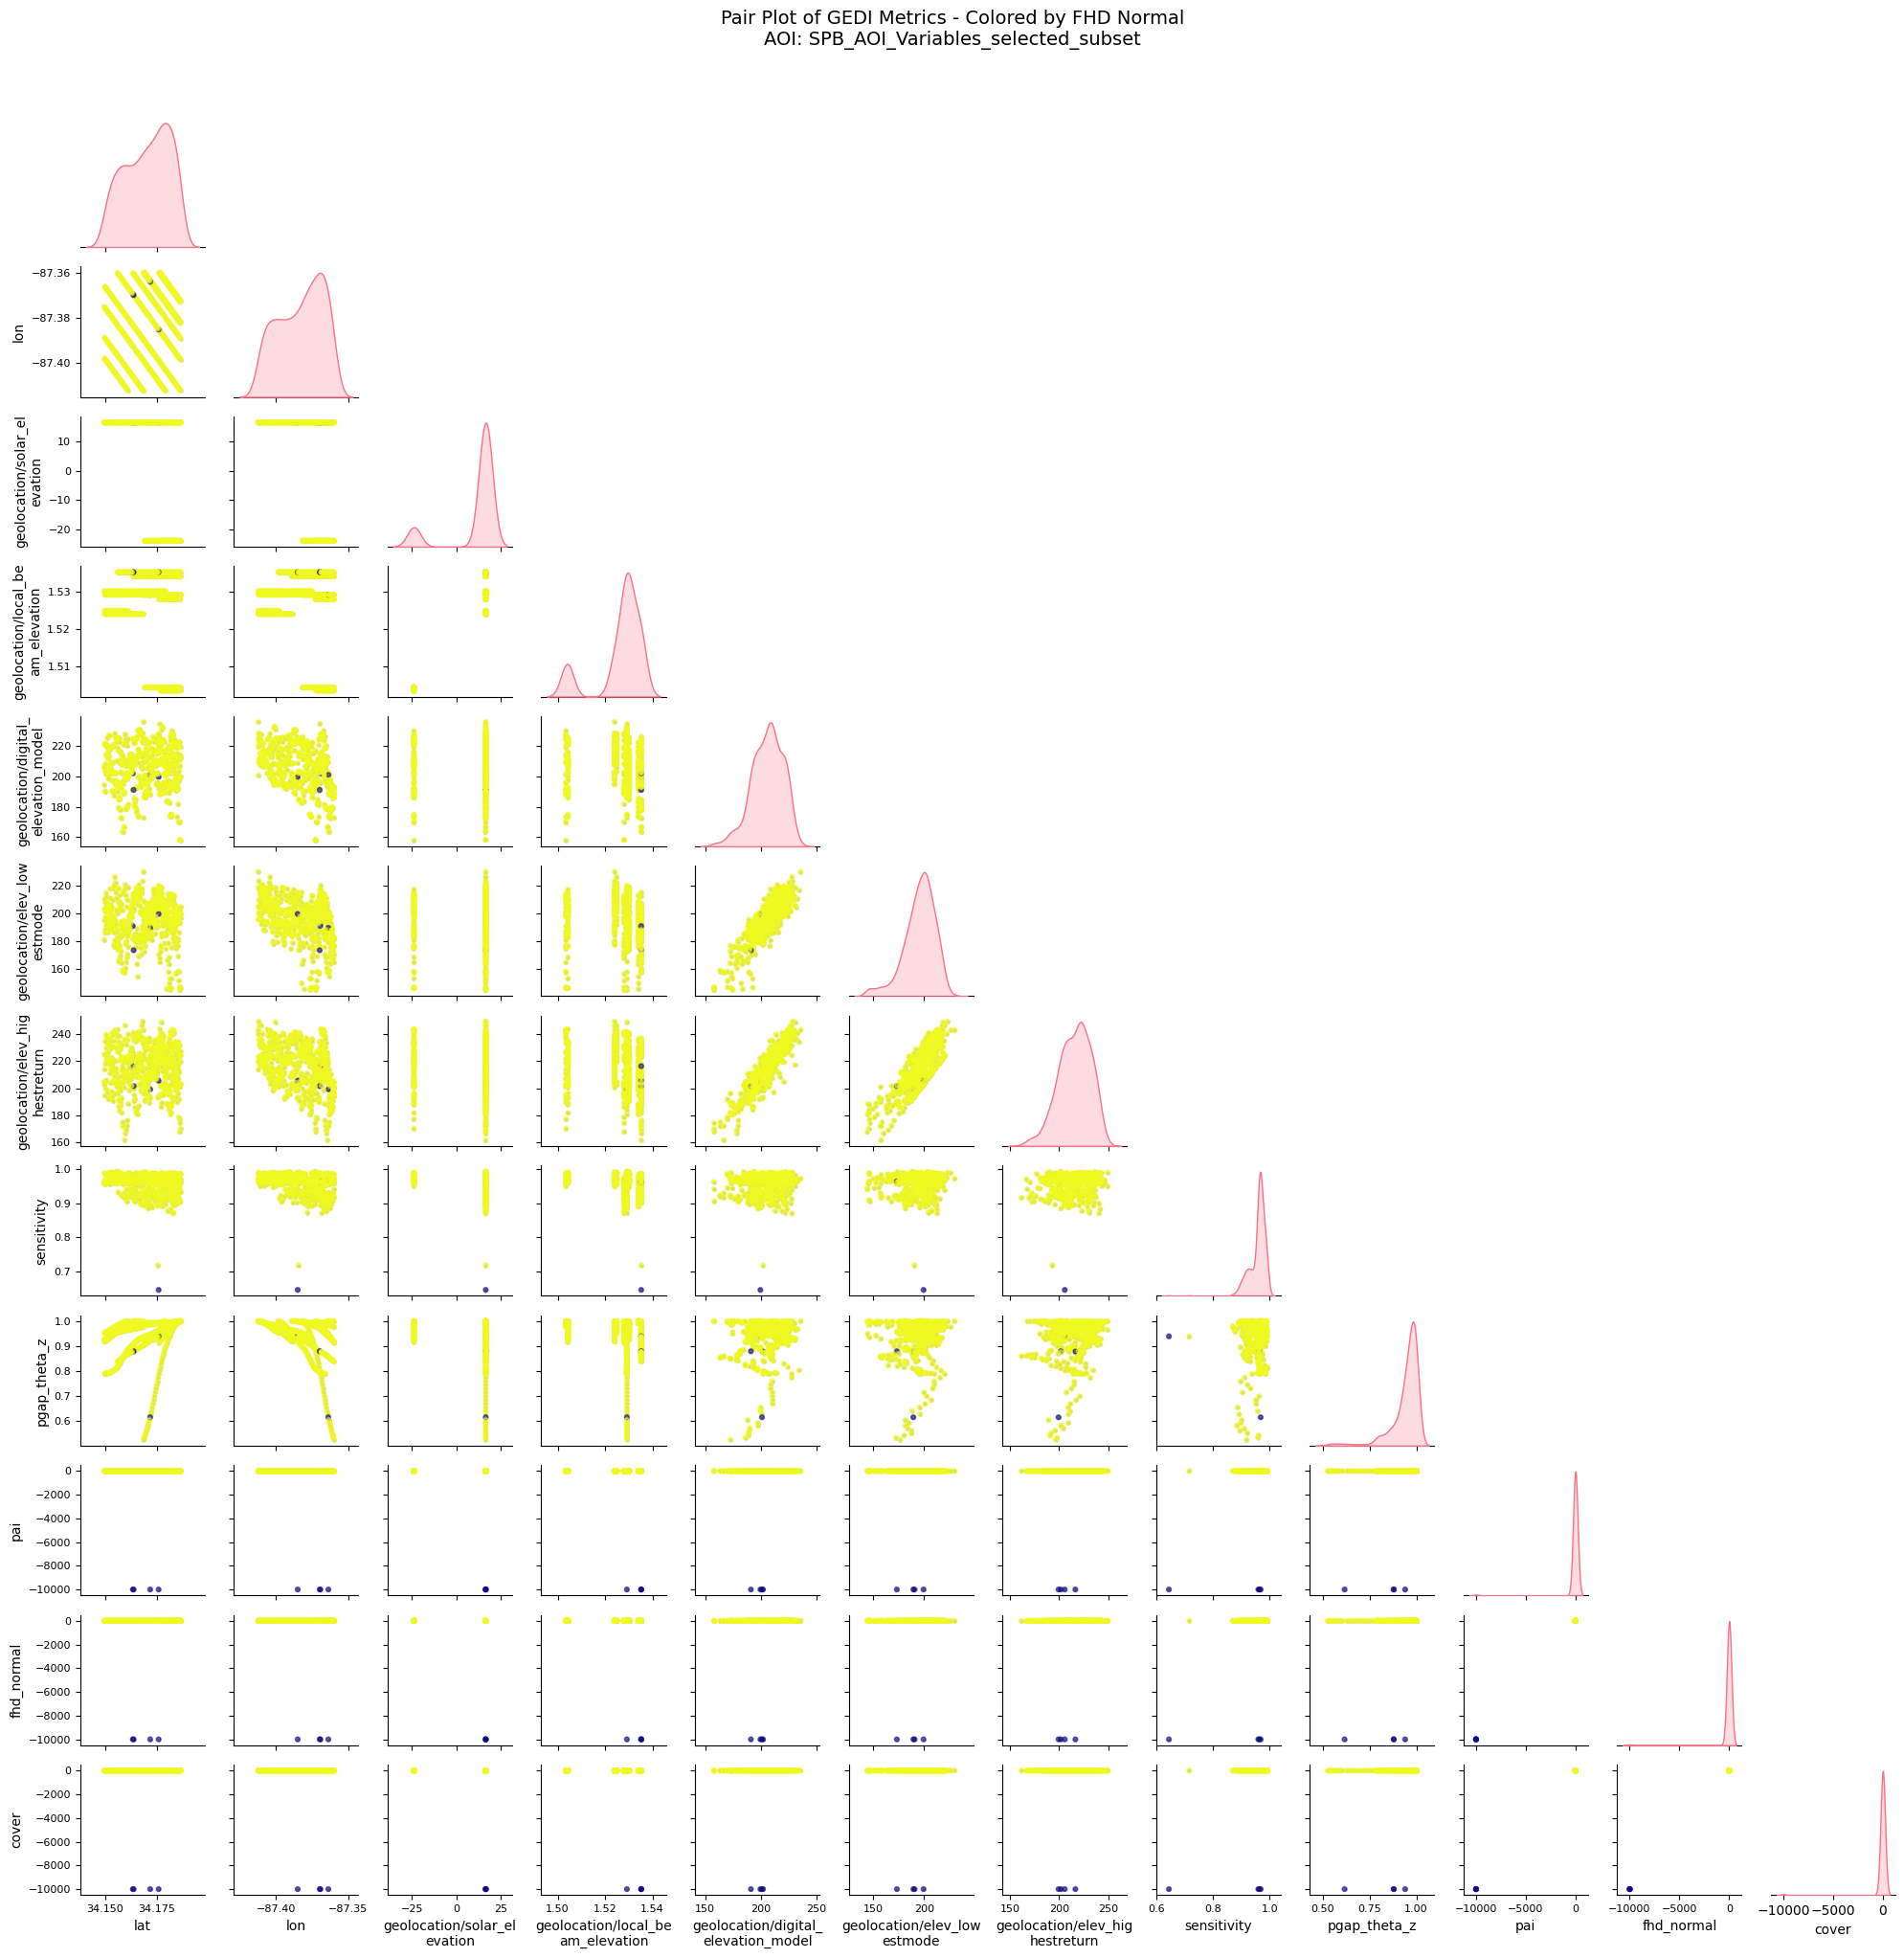

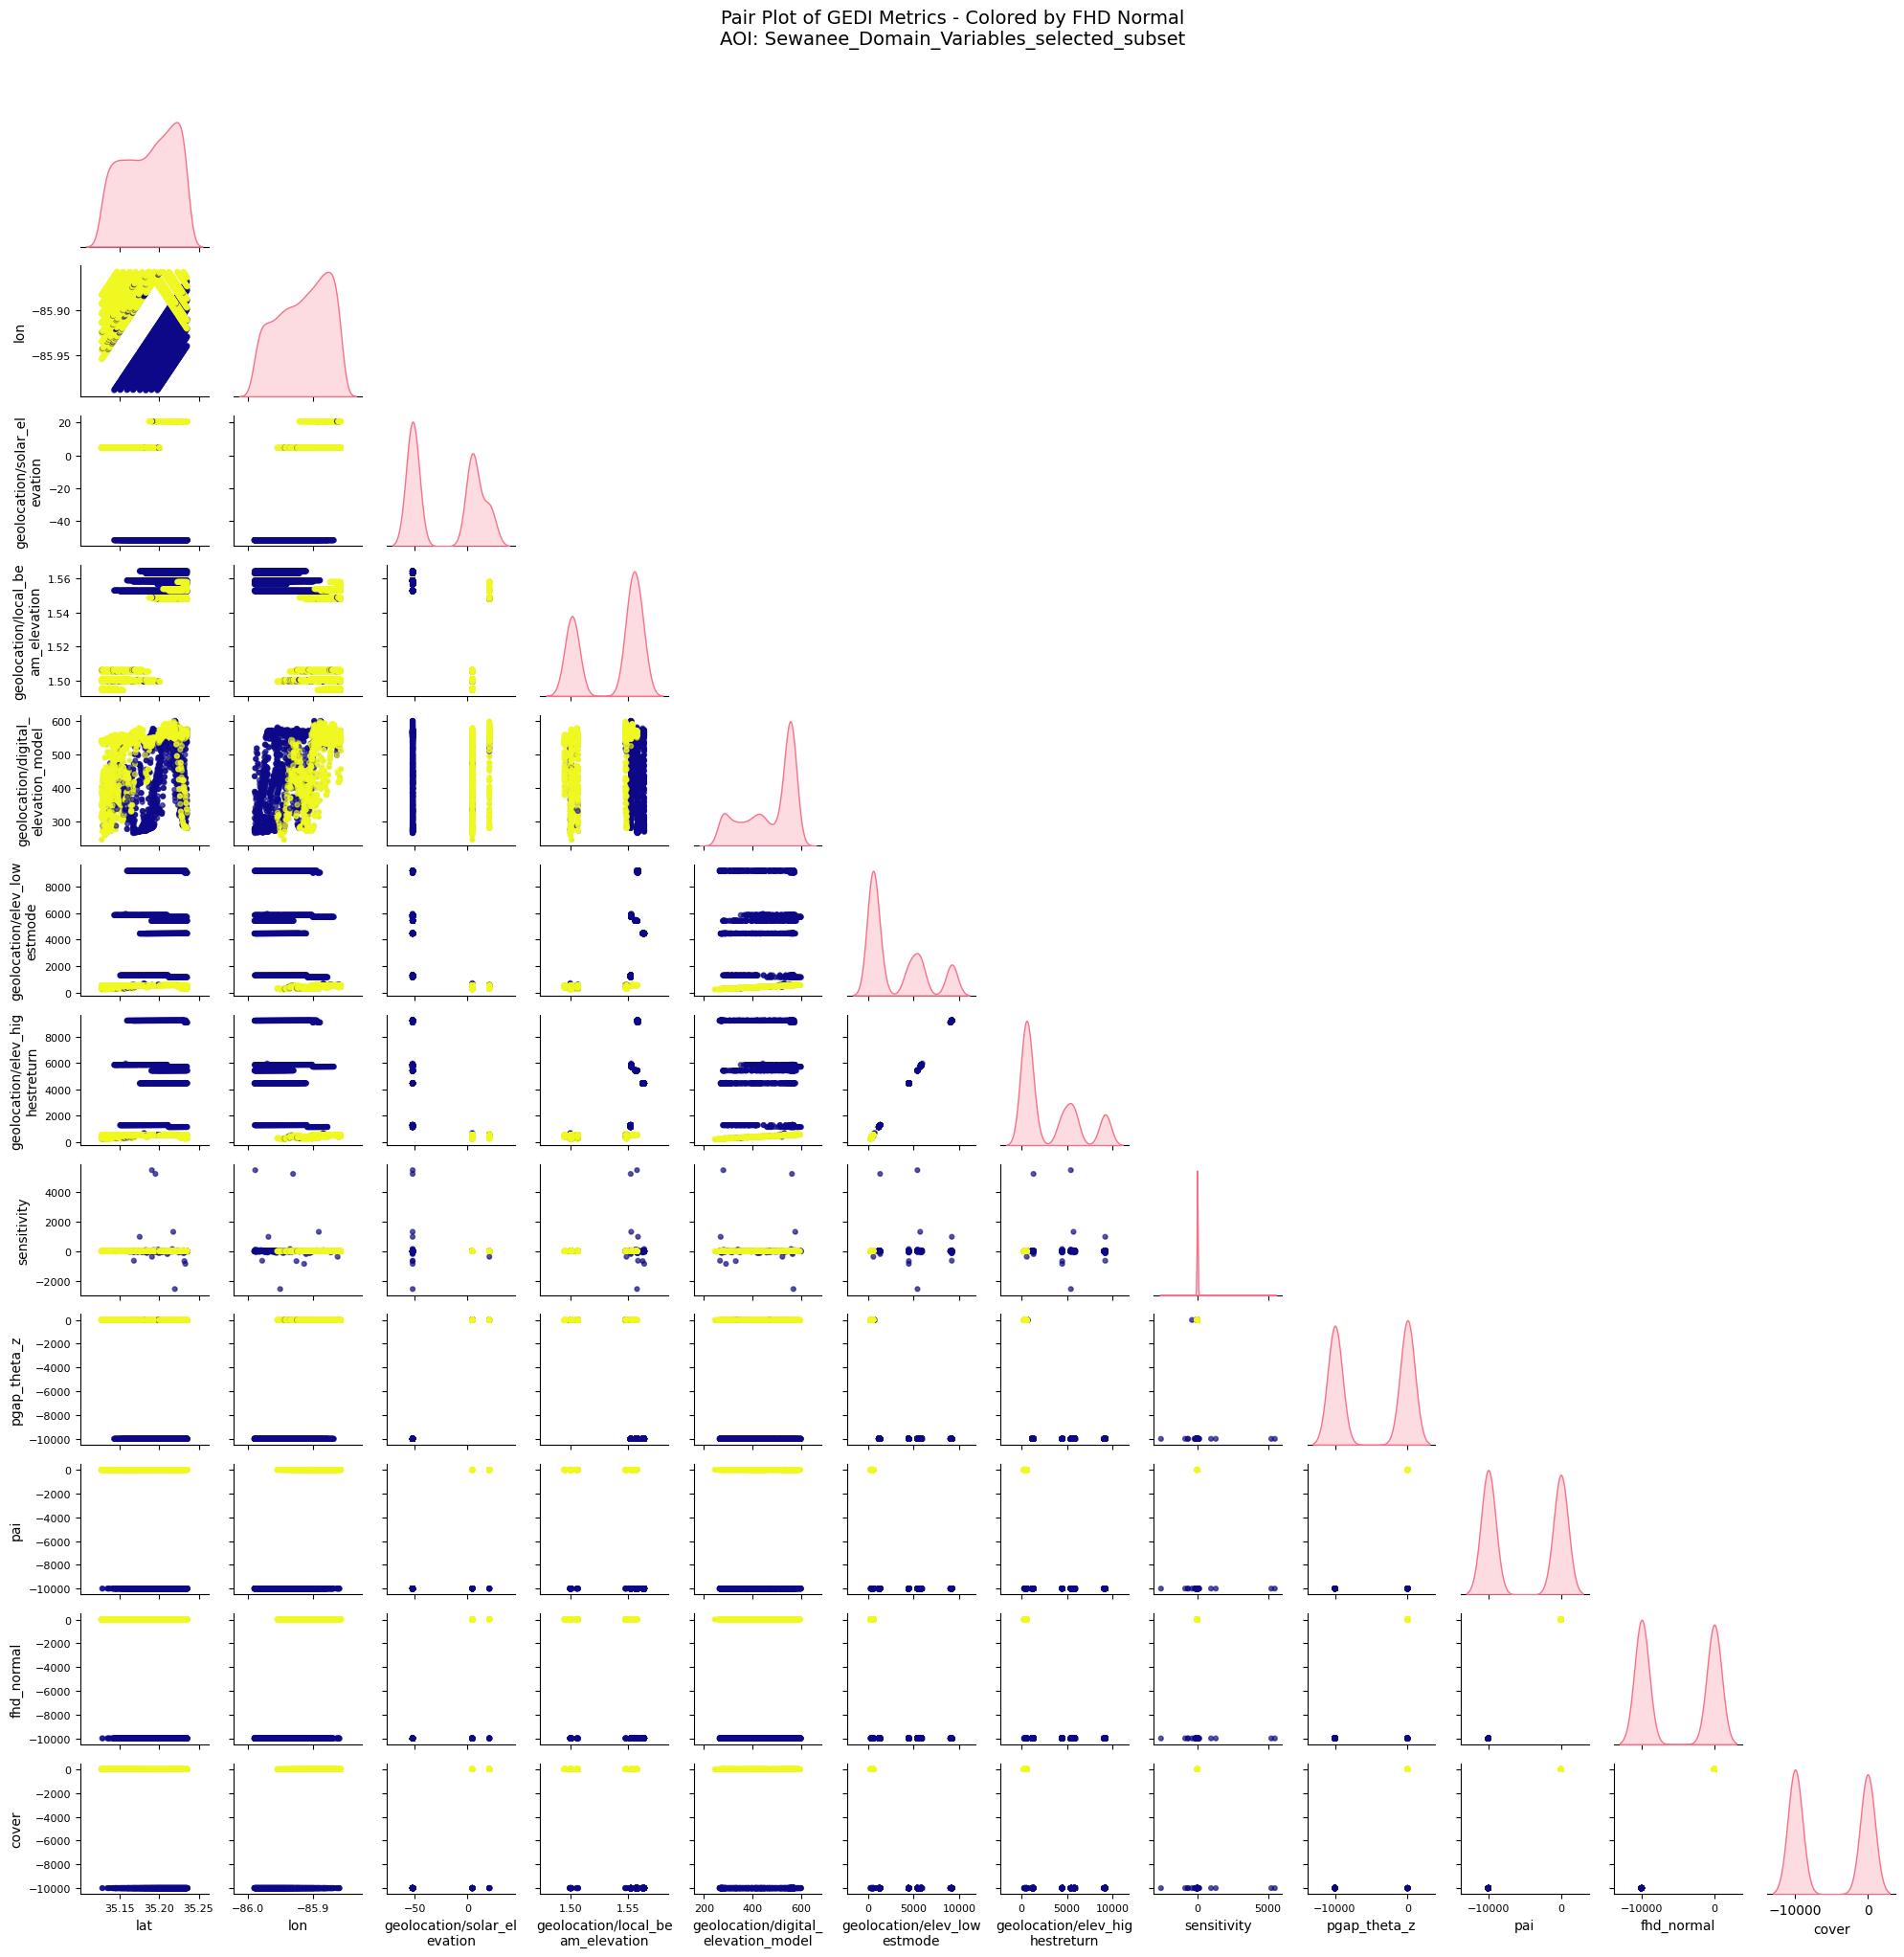

In [171]:
#### Pairplot on the filtered datasets

# Modern colormap access
cmap = mpl.colormaps['plasma']

for aoi_name, gdf in geo_dfs.items():
    numeric_cols = gdf.select_dtypes(include=[np.number]).columns.tolist()
    if 'fhd_normal' not in numeric_cols or gdf.empty:
        print(f"Skipping {aoi_name} (no numeric data or missing fhd_normal)")
        continue

    # Clean data
    plot_df = gdf[numeric_cols].dropna()

    # Normalize for coloring
    norm = Normalize(vmin=plot_df['fhd_normal'].min(), vmax=plot_df['fhd_normal'].max())
    colors = cmap(norm(plot_df['fhd_normal'].values))

    # Create base pairplot
    pair_grid = sns.pairplot(
        plot_df,
        corner=True,
        diag_kind='kde',
        plot_kws={'s': 10, 'alpha': 0.5, 'color': 'gray'},
        diag_kws={'fill': True}
    )

    # Resize figure for clarity
    pair_grid.fig.set_size_inches(20, 20)

    # Overlay color-coded scatter
    for i, j in zip(*np.tril_indices_from(pair_grid.axes, -1)):
        ax = pair_grid.axes[i, j]
        if ax:
            x = plot_df.iloc[:, j]
            y = plot_df.iloc[:, i]
            ax.scatter(x, y, c=colors, s=12, alpha=0.6)

            # Verbose wrapped labels
            ax.set_xlabel(textwrap.fill(plot_df.columns[j], 20), fontsize=10)
            ax.set_ylabel(textwrap.fill(plot_df.columns[i], 20), fontsize=10)
            ax.tick_params(labelsize=8)

    # Colorbar
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    #cbar = pair_grid.fig.colorbar(sm, ax=pair_grid.fig.axes, label='FHD Normal', shrink=0.7, pad=0.02)

    # Add title and adjust layout
    pair_grid.fig.suptitle(
        f"Pair Plot of GEDI Metrics - Colored by FHD Normal\nAOI: {aoi_name}",
        fontsize=14, y=1.02
    )
    pair_grid.fig.subplots_adjust(top=0.95, wspace=0.3, hspace=0.3)
    plt.tight_layout()
    plt.show()


CREATING YEARLY MONTHLY AOI OBSERVATION COUNT CHARTS

--- Processing SPB_AOI ---
SPB_AOI: 581 total observations
Available columns: ['lat', 'lon', 'geolocation/solar_elevation', 'geolocation/local_beam_elevation', 'selected_l2a_algorithm', 'geolocation/degrade_flag', 'l2b_quality_flag', 'geolocation/digital_elevation_model', 'geolocation/elev_lowestmode', 'geolocation/elev_highestreturn', 'rh100', 'shot_number', 'num_detectedmodes', 'sensitivity', 'land_cover_data/leaf_off_flag', 'pgap_theta_z', 'pai', 'pai_z', 'fhd_normal', 'pavd_z', 'cover', 'cover_z', 'product', 'Beam', 'fileName', 'date']
Date processing successful
Sample dates: ['2022-04-03', '2022-04-03', '2022-04-03']
Year range: 2022 - 2022
Years found: [np.int64(2022)]
  Year 2022: 581 observations
  2022: 581 total, peak month 2 (502 obs)

--- Processing Prescribed_Burn_AOI ---
Prescribed_Burn_AOI: Empty dataframe

--- Processing PaintRock_AOI ---
PaintRock_AOI: Empty dataframe

--- Processing Sewanee_Domain ---
Sewanee_Domai

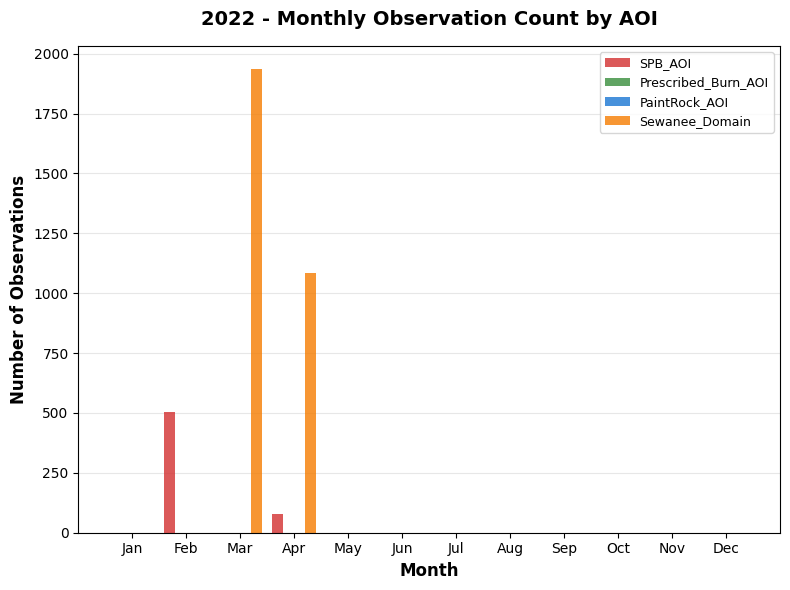


YEARLY MONTHLY BREAKDOWN

2022:
AOI  SPB_AOI  Sewanee_Domain
Jan        0               0
Feb      502               0
Mar        0            1936
Apr       79            1084
May        0               0
Jun        0               0
Jul        0               0
Aug        0               0
Sep        0               0
Oct        0               0
Nov        0               0
Dec        0               0

FINAL RESULTS BY YEAR

2022 - Total observations by AOI:
AOI
Sewanee_Domain    3020
SPB_AOI            581
Name: Count, dtype: int64

SCRIPT COMPLETED SUCCESSFULLY!


In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

def safe_extract_date_info(date_str):
    """Safely extract year and month from date string"""
    try:
        # Handle various date formats
        date_str = str(date_str)
        if len(date_str) >= 10:
            # Extract YYYY-MM-DD part
            date_part = date_str[:10]
            # Parse and get year and month
            dt = pd.to_datetime(date_part, format='%Y-%m-%d')
            return dt.year, dt.month
        else:
            # fallback - random year between 2020-2024 and random month
            return np.random.randint(2020, 2025), np.random.randint(1, 13)
    except:
        # fallback - random year between 2020-2024 and random month
        return np.random.randint(2020, 2025), np.random.randint(1, 13)

def process_aoi_counts_by_year(df, aoi_name):
    """Process AOI data to count total observations per month per year"""
    print(f"\n--- Processing {aoi_name} ---")

    if df is None or len(df) == 0:
        print(f"{aoi_name}: Empty dataframe")
        return pd.DataFrame()

    print(f"{aoi_name}: {len(df)} total observations")

    # Convert to regular dataframe to avoid GeoDataFrame issues
    try:
        if hasattr(df, 'drop'):
            # Try to drop geometry column if it exists
            work_df = df.drop(columns=['geometry'], errors='ignore')
        else:
            work_df = df
        work_df = pd.DataFrame(work_df)
    except:
        work_df = pd.DataFrame(df)

    # Check columns
    print(f"Available columns: {list(work_df.columns)}")

    # Extract year and month from Date column
    if 'date' in work_df.columns:
        date_info = work_df['date'].apply(safe_extract_date_info)
        work_df['Year'] = [info[0] for info in date_info]
        work_df['Month'] = [info[1] for info in date_info]
        print(f"Date processing successful")

        # Show date range
        try:
            sample_dates = work_df['date'].head(3).tolist()
            print(f"Sample dates: {sample_dates}")
            print(f"Year range: {work_df['Year'].min()} - {work_df['Year'].max()}")
        except:
            pass

    else:
        print(f"No 'date' column found - using random years and months")
        work_df['Year'] = np.random.randint(2020, 2025, len(work_df))
        work_df['Month'] = np.random.randint(1, 13, len(work_df))

    # Get all unique years
    years = sorted(work_df['Year'].unique())
    print(f"Years found: {years}")

    # Count observations per month per year
    yearly_monthly_summary = []

    for year in years:
        year_data = work_df[work_df['Year'] == year]
        print(f"  Year {year}: {len(year_data)} observations")

        for month in range(1, 13):
            month_data = year_data[year_data['Month'] == month]
            count = len(month_data)

            yearly_monthly_summary.append({
                'AOI': aoi_name,
                'Year': year,
                'Month': month,
                'Count': count
            })

    result_df = pd.DataFrame(yearly_monthly_summary)

    # Print summary by year
    for year in years:
        year_data = result_df[result_df['Year'] == year]
        total_obs = year_data['Count'].sum()
        if total_obs > 0:
            max_month = year_data.loc[year_data['Count'].idxmax(), 'Month']
            max_count = year_data['Count'].max()
            print(f"  {year}: {total_obs} total, peak month {max_month} ({max_count} obs)")

    return result_df

def create_yearly_monthly_charts(geo_dfs):
    """Create separate bar charts for each year showing monthly counts by AOI"""

    print("="*60)
    print("CREATING YEARLY MONTHLY AOI OBSERVATION COUNT CHARTS")
    print("="*60)

    # Process each AOI
    all_results = []
    for aoi_name, df in geo_dfs.items():
        aoi_result = process_aoi_counts_by_year(df, aoi_name)
        if not aoi_result.empty:
            all_results.append(aoi_result)

    if not all_results:
        print("No data to process!")
        return pd.DataFrame()

    # Combine all results
    combined_data = pd.concat(all_results, ignore_index=True)

    # Get all unique years
    years = sorted(combined_data['Year'].unique())
    print(f"\nYears to plot: {years}")

    print("\n" + "="*60)
    print("COMBINED DATA SUMMARY BY YEAR")
    print("="*60)

    for year in years:
        year_data = combined_data[combined_data['Year'] == year]
        summary_stats = year_data.groupby('AOI')['Count'].agg(['sum', 'mean', 'max']).round(1)
        print(f"\n{year}:")
        print(summary_stats)

    # Create subplots - one for each year
    n_years = len(years)

    # Calculate subplot layout
    if n_years <= 2:
        rows, cols = 1, n_years
        figsize = (8 * n_years, 6)
    elif n_years <= 4:
        rows, cols = 2, 2
        figsize = (16, 12)
    else:
        rows = (n_years + 2) // 3  # Ceiling division
        cols = 3
        figsize = (20, 6 * rows)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    # If only one subplot, make axes a list
    if n_years == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes if isinstance(axes, (list, np.ndarray)) else [axes]
    else:
        axes = axes.flatten()

    # Month names and positions
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months = np.arange(1, 13)

    # AOI names and colors
    aoi_names = list(geo_dfs.keys())
    colors = {
        'SPB_AOI': '#d32f2f',                    # Red
        'Prescribed_Burn_AOI': '#388e3c',       # Green
        'PaintRock_AOI': '#1976d2',             # Blue
        'Sewanee_Domain': '#f57c00'             # Orange
    }

    # Bar settings
    bar_width = 0.2

    # Plot each year
    for year_idx, year in enumerate(years):
        ax = axes[year_idx]
        year_data = combined_data[combined_data['Year'] == year]

        # Plot bars for each AOI
        for i, aoi in enumerate(aoi_names):
            aoi_year_data = year_data[year_data['AOI'] == aoi].sort_values('Month')

            if len(aoi_year_data) == 0:
                # No data for this AOI in this year - create empty data
                counts = np.zeros(12)
            else:
                # Get counts for all 12 months
                month_counts = {}
                for _, row in aoi_year_data.iterrows():
                    month_counts[row['Month']] = row['Count']
                counts = [month_counts.get(month, 0) for month in range(1, 13)]

            # Bar positions (offset each AOI)
            positions = months + (i - 1.5) * bar_width

            # Color for this AOI
            color = colors.get(aoi, f'C{i}')

            # Plot bars
            bars = ax.bar(positions, counts, bar_width,
                         label=aoi, color=color, alpha=0.8)

        # Customize subplot
        ax.set_xlabel('Month', fontsize=12, fontweight='bold')
        ax.set_ylabel('Number of Observations', fontsize=12, fontweight='bold')
        ax.set_title(f'{year} - Monthly Observation Count by AOI',
                     fontsize=14, fontweight='bold', pad=15)

        # Set x-axis
        ax.set_xticks(months)
        ax.set_xticklabels(month_names)

        # Add grid and legend
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_axisbelow(True)
        ax.legend(loc='upper right', fontsize=9)

        # Set y-axis to start at 0
        ax.set_ylim(bottom=0)

    # Hide empty subplots
    for idx in range(n_years, len(axes)):
        axes[idx].set_visible(False)

    # Layout and show
    plt.tight_layout()
    plt.show()

    # Print yearly breakdown
    print("\n" + "="*60)
    print("YEARLY MONTHLY BREAKDOWN")
    print("="*60)

    for year in years:
        print(f"\n{year}:")
        year_data = combined_data[combined_data['Year'] == year]
        if len(year_data) > 0:
            pivot_table = year_data.pivot(index='Month', columns='AOI', values='Count').fillna(0)
            pivot_table.index = [month_names[i-1] for i in pivot_table.index]
            print(pivot_table.astype(int))
        else:
            print("No data")

    return combined_data

# Main execution
if __name__ == "__main__":

    # Your data dictionary
    geo_dfs = {
        'SPB_AOI': SPB_AOI,
        'Prescribed_Burn_AOI': Prescribed_Burn_AOI,
        'PaintRock_AOI': PaintRock_AOI,
        'Sewanee_Domain': Sewanee_Domain
    }

    # Create yearly charts
    result_data = create_yearly_monthly_charts(geo_dfs)

    if not result_data.empty:
        print("\n" + "="*60)
        print("FINAL RESULTS BY YEAR")
        print("="*60)

        years = sorted(result_data['Year'].unique())
        for year in years:
            print(f"\n{year} - Total observations by AOI:")
            year_data = result_data[result_data['Year'] == year]
            total_by_aoi = year_data.groupby('AOI')['Count'].sum().sort_values(ascending=False)
            print(total_by_aoi)

        # Optional: Save results
        # result_data.to_csv('yearly_monthly_aoi_counts.csv', index=False)
        # print("\nResults saved to 'yearly_monthly_aoi_counts.csv'")

    print("\n" + "="*60)
    print("SCRIPT COMPLETED SUCCESSFULLY!")
    print("="*60)

In [173]:
print('Check Sewanee beam counts', Sewanee_Domain['Beam'].value_counts())
print('Check SPB beam counts', SPB_AOI['Beam'].value_counts())
print('Check Prescribed burn beam counts', Prescribed_Burn_AOI['Beam'].value_counts())
print('Check Paint Rock beam counts', PaintRock_AOI['Beam'].value_counts())

Check Sewanee beam counts Beam
BEAM1011    455
BEAM1000    439
BEAM0110    407
BEAM0101    385
BEAM0011    358
BEAM0010    337
BEAM0001    320
BEAM0000    319
Name: count, dtype: int64
Check SPB beam counts Beam
BEAM0101    104
BEAM0011     85
BEAM1011     83
BEAM1000     82
BEAM0110     82
BEAM0010     64
BEAM0001     51
BEAM0000     30
Name: count, dtype: int64


KeyError: 'Beam'

In [ ]:
print(Sewanee_Domain['date'].value_counts())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

def safe_extract_date_info(date_str):
    """Safely extract year and month from date string"""
    try:
        # Handle various date formats
        date_str = str(date_str)
        if len(date_str) >= 10:
            # Extract YYYY-MM-DD part
            date_part = date_str[:10]
            # Parse and get year and month
            dt = pd.to_datetime(date_part, format='%Y-%m-%d')
            return dt.year, dt.month
        else:
            # fallback - random year between 2020-2024 and random month
            return np.random.randint(2020, 2025), np.random.randint(1, 13)
    except:
        # fallback - random year between 2020-2024 and random month
        return np.random.randint(2020, 2025), np.random.randint(1, 13)

def process_aoi_counts_by_year(df, aoi_name):
    """Process AOI data to count total observations per month per year"""
    print(f"\n--- Processing {aoi_name} ---")

    if df is None or len(df) == 0:
        print(f"{aoi_name}: Empty dataframe")
        return pd.DataFrame()

    print(f"{aoi_name}: {len(df)} total observations")

    # Convert to regular dataframe to avoid GeoDataFrame issues
    try:
        if hasattr(df, 'drop'):
            # Try to drop geometry column if it exists
            work_df = df.drop(columns=['geometry'], errors='ignore')
        else:
            work_df = df
        work_df = pd.DataFrame(work_df)
    except:
        work_df = pd.DataFrame(df)

    # Check columns
    print(f"Available columns: {list(work_df.columns)}")

    # Extract year and month from Date column
    if 'date' in work_df.columns:
        date_info = work_df['date'].apply(safe_extract_date_info)
        work_df['Year'] = [info[0] for info in date_info]
        work_df['Month'] = [info[1] for info in date_info]
        print(f"Date processing successful")

        # Show date range
        try:
            sample_dates = work_df['date'].head(3).tolist()
            print(f"Sample dates: {sample_dates}")
            print(f"Year range: {work_df['Year'].min()} - {work_df['Year'].max()}")
        except:
            pass

    else:
        print(f"No 'date' column found - using random years and months")
        work_df['Year'] = np.random.randint(2020, 2025, len(work_df))
        work_df['Month'] = np.random.randint(1, 13, len(work_df))

    # Get all unique years
    years = sorted(work_df['Year'].unique())
    print(f"Years found: {years}")

    # Count observations per month per year
    yearly_monthly_summary = []

    for year in years:
        year_data = work_df[work_df['Year'] == year]
        print(f"  Year {year}: {len(year_data)} observations")

        for month in range(1, 13):
            month_data = year_data[year_data['Month'] == month]
            count = len(month_data)

            yearly_monthly_summary.append({
                'AOI': aoi_name,
                'Year': year,
                'Month': month,
                'Count': count
            })

    result_df = pd.DataFrame(yearly_monthly_summary)

    # Print summary by year
    for year in years:
        year_data = result_df[result_df['Year'] == year]
        total_obs = year_data['Count'].sum()
        if total_obs > 0:
            max_month = year_data.loc[year_data['Count'].idxmax(), 'Month']
            max_count = year_data['Count'].max()
            print(f"  {year}: {total_obs} total, peak month {max_month} ({max_count} obs)")

    return result_df

def create_aoi_yearly_comparison_charts(geo_dfs):
    """Create separate figures for each AOI with years as different bars per month"""

    print("="*60)
    print("CREATING AOI-BASED YEARLY COMPARISON CHARTS")
    print("="*60)

    # Process each AOI
    all_results = []
    for aoi_name, df in geo_dfs.items():
        aoi_result = process_aoi_counts_by_year(df, aoi_name)
        if not aoi_result.empty:
            all_results.append(aoi_result)

    if not all_results:
        print("No data to process!")
        return pd.DataFrame()

    # Combine all results
    combined_data = pd.concat(all_results, ignore_index=True)

    # Get all unique years across all AOIs
    all_years = sorted(combined_data['Year'].unique())
    print(f"\nAll years found: {all_years}")

    # Month names and positions
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    months = np.arange(1, 13)

    # Year colors - generate distinct colors for each year
    year_colors = {}
    color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                     '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for i, year in enumerate(all_years):
        year_colors[year] = color_palette[i % len(color_palette)]

    # Create separate figure for each AOI
    for aoi_name in geo_dfs.keys():
        print(f"\n--- Creating chart for {aoi_name} ---")

        # Filter data for this AOI
        aoi_data = combined_data[combined_data['AOI'] == aoi_name]

        if aoi_data.empty:
            print(f"No data for {aoi_name}, skipping...")
            continue

        # Get years available for this AOI
        aoi_years = sorted(aoi_data['Year'].unique())
        print(f"Years available for {aoi_name}: {aoi_years}")

        # Create figure
        fig, ax = plt.subplots(figsize=(14, 8))

        # Calculate bar width and positions
        n_years = len(aoi_years)
        bar_width = 0.8 / n_years  # Total width of 0.8 divided by number of years

        # Plot bars for each year
        for i, year in enumerate(aoi_years):
            year_data = aoi_data[aoi_data['Year'] == year].sort_values('Month')

            # Get counts for all 12 months
            month_counts = {}
            for _, row in year_data.iterrows():
                month_counts[row['Month']] = row['Count']
            counts = [month_counts.get(month, 0) for month in range(1, 13)]

            # Bar positions (offset each year)
            positions = months + (i - (n_years-1)/2) * bar_width

            # Color for this year
            color = year_colors[year]

            # Plot bars
            bars = ax.bar(positions, counts, bar_width,
                         label=str(year), color=color, alpha=0.8)

            # Add value labels on top of bars (for non-zero values)
            for bar, count in zip(bars, counts):
                if count > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + ax.get_ylim()[1]*0.01,
                           f'{int(count)}', ha='center', va='bottom', fontsize=8)

        # Customize plot
        ax.set_xlabel('Month', fontsize=14, fontweight='bold')
        ax.set_ylabel('Number of Observations', fontsize=14, fontweight='bold')
        ax.set_title(f'{aoi_name} - Monthly Observations by Year',
                     fontsize=16, fontweight='bold', pad=20)

        # Set x-axis
        ax.set_xticks(months)
        ax.set_xticklabels(month_names)

        # Add grid and legend
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_axisbelow(True)
        ax.legend(title='Year', loc='upper right', fontsize=11)

        # Set y-axis to start at 0
        ax.set_ylim(bottom=0)

        # Layout and show
        plt.tight_layout()
        plt.show()

        # Print breakdown for this AOI
        print(f"\n{aoi_name} - Monthly breakdown:")
        pivot_table = aoi_data.pivot(index='Month', columns='Year', values='Count').fillna(0)
        pivot_table.index = [month_names[i-1] for i in pivot_table.index]
        print(pivot_table.astype(int))

    # Summary statistics
    print("\n" + "="*60)
    print("SUMMARY BY AOI AND YEAR")
    print("="*60)

    for aoi_name in geo_dfs.keys():
        print(f"\n{aoi_name}:")
        aoi_data = combined_data[combined_data['AOI'] == aoi_name]
        if not aoi_data.empty:
            yearly_totals = aoi_data.groupby('Year')['Count'].sum().sort_index()
            for year, total in yearly_totals.items():
                print(f"  {year}: {total} total observations")

            # Peak months by year
            print(f"  Peak months:")
            for year in sorted(aoi_data['Year'].unique()):
                year_data = aoi_data[aoi_data['Year'] == year]
                if year_data['Count'].sum() > 0:
                    peak_month_idx = year_data.loc[year_data['Count'].idxmax(), 'Month']
                    peak_count = year_data['Count'].max()
                    peak_month_name = month_names[peak_month_idx - 1]
                    print(f"    {year}: {peak_month_name} ({peak_count} obs)")
        else:
            print("  No data available")

    return combined_data

# Main execution
if __name__ == "__main__":

    # Your data dictionary
    geo_dfs = {
        'SPB_AOI': SPB_AOI,
        'Prescribed_Burn_AOI': Prescribed_Burn_AOI,
        'PaintRock_AOI': PaintRock_AOI,
        'Sewanee_Domain': Sewanee_Domain
    }

    # Create AOI-based yearly comparison charts
    result_data = create_aoi_yearly_comparison_charts(geo_dfs)

    if not result_data.empty:
        print("\n" + "="*60)
        print("FINAL RESULTS SUMMARY")
        print("="*60)

        # Overall summary
        total_by_aoi = result_data.groupby('AOI')['Count'].sum().sort_values(ascending=False)
        print("\nTotal observations by AOI (all years):")
        print(total_by_aoi)

        total_by_year = result_data.groupby('Year')['Count'].sum().sort_index()
        print(f"\nTotal observations by year (all AOIs):")
        print(total_by_year)

        # Optional: Save results
        # result_data.to_csv('aoi_yearly_monthly_counts.csv', index=False)
        # print("\nResults saved to 'aoi_yearly_monthly_counts.csv'")

    print("\n" + "="*60)
    print("SCRIPT COMPLETED SUCCESSFULLY!")
    print("="*60)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Define beam categories
beams_power = ['BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']  # power beams
beams_coverage = ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011']  # coverage beams

def categorize_beam(beam_value):
    """Categorize beam as 'Power', 'Coverage', or 'Other'"""
    if pd.isna(beam_value):
        return 'Other'

    beam_str = str(beam_value)
    if beam_str in beams_power:
        return 'Power'
    elif beam_str in beams_coverage:
        return 'Coverage'
    else:
        return 'Other'

def process_single_aoi(df, aoi_name):
    """Process a single AOI dataframe to count monthly observations by beam type"""

    # Handle empty dataframes
    if df.empty:
        print(f"Warning: {aoi_name} is empty")
        return pd.DataFrame({
            'Month': range(1, 13),
            'Power': [0] * 12,
            'Coverage': [0] * 12,
            'AOI': [aoi_name] * 12
        })

    print(f"Processing {aoi_name}: {len(df)} observations")

    # Make a copy to avoid modifying original
    df_work = df.copy()

    # Extract month from Date column (format: YYYY-MM-DD HH:MM:SS)
    try:
        # Extract only the date part (first 10 characters: YYYY-MM-DD)
        df_work['Date_only'] = df_work['date'].astype(str).str[:10]
        df_work['Month'] = pd.to_datetime(df_work['Date_only'], format='%Y-%m-%d').dt.month
        print(f"  - Date range: {df_work['Date_only'].min()} to {df_work['Date_only'].max()}")
    except Exception as e:
        print(f"Error parsing dates for {aoi_name}: {e}")
        print(f"Sample date values: {df_work['date'].head().tolist()}")
        # Use random months as fallback
        #df_work['Month'] = np.random.randint(1, 13, len(df_work))

    # Categorize beams
    df_work['Beam_Type'] = df_work['Beam'].apply(categorize_beam)

    # Count by month and beam type
    counts = df_work.groupby(['Month', 'Beam_Type']).size().reset_index(name='Count')

    # Pivot to get Power and Coverage as separate columns
    pivot_counts = counts.pivot(index='Month', columns='Beam_Type', values='Count').fillna(0)

    # Ensure we have all months (1-12) and both beam types
    full_months = pd.DataFrame({'Month': range(1, 13)})
    full_months = full_months.set_index('Month')

    # Reindex to include all months
    pivot_counts = pivot_counts.reindex(full_months.index, fill_value=0)

    # Ensure Power and Coverage columns exist
    if 'Power' not in pivot_counts.columns:
        pivot_counts['Power'] = 0
    if 'Coverage' not in pivot_counts.columns:
        pivot_counts['Coverage'] = 0

    # Reset index and add AOI name
    result = pivot_counts.reset_index()
    result['AOI'] = aoi_name

    # Select only the columns we need
    result = result[['Month', 'Power', 'Coverage', 'AOI']]

    print(f"  - Power beams total: {result['Power'].sum()}")
    print(f"  - Coverage beams total: {result['Coverage'].sum()}")

    return result

def create_stacked_bar_chart(geo_dfs, figsize=(16, 10)):
    """Create stacked bar chart from dictionary of AOI dataframes"""

    print("Creating stacked bar chart...")
    print(f"Processing {len(geo_dfs)} AOIs: {list(geo_dfs.keys())}")

    # Process each AOI
    all_data = []
    for aoi_name, df in geo_dfs.items():
        aoi_data = process_single_aoi(df, aoi_name)
        all_data.append(aoi_data)

    # Combine all AOI data
    combined_df = pd.concat(all_data, ignore_index=True)

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Define colors for each AOI
    aoi_colors = {
        'SPB_AOI': {'Power': '#d32f2f', 'Coverage': '#ffcdd2'},
        'Prescribed_Burn_AOI': {'Power': '#388e3c', 'Coverage': '#c8e6c9'},
        'PaintRock_AOI': {'Power': '#1976d2', 'Coverage': '#bbdefb'},
        'Sewanee_Domain': {'Power': '#f57c00', 'Coverage': '#ffe0b2'}
    }

    # Month names for x-axis
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Set up bar positions
    months = range(1, 13)
    aoi_list = list(geo_dfs.keys())
    bar_width = 0.2

    # Create bars for each AOI
    for i, aoi in enumerate(aoi_list):
        # Get data for this AOI
        aoi_data = combined_df[combined_df['AOI'] == aoi].sort_values('Month')

        # Calculate bar positions (offset each AOI)
        positions = np.array(months) + (i - 1.5) * bar_width

        # Get colors for this AOI
        colors = aoi_colors.get(aoi, {'Power': f'C{i*2}', 'Coverage': f'C{i*2+1}'})

        # Plot stacked bars
        power_counts = aoi_data['Power'].values
        coverage_counts = aoi_data['Coverage'].values

        # Power beams (bottom of stack)
        ax.bar(positions, power_counts, bar_width,
               label=f'{aoi} Power', color=colors['Power'], alpha=0.8)

        # Coverage beams (top of stack)
        ax.bar(positions, coverage_counts, bar_width, bottom=power_counts,
               label=f'{aoi} Coverage', color=colors['Coverage'], alpha=0.8)

    # Customize plot
    ax.set_xlabel('Month', fontsize=14, fontweight='bold')
    ax.set_ylabel('Count', fontsize=14, fontweight='bold')
    ax.set_title('Monthly Observations by Area of Interest\n(Stacked: Power + Coverage Beams)',
                 fontsize=16, fontweight='bold', pad=20)

    # Set x-axis
    ax.set_xticks(months)
    ax.set_xticklabels(month_names)

    # Add grid
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)

    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # Adjust layout
    plt.tight_layout()

    # Print summary statistics
    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)

    for aoi in aoi_list:
        aoi_data = combined_df[combined_df['AOI'] == aoi]
        power_total = aoi_data['Power'].sum()
        coverage_total = aoi_data['Coverage'].sum()
        total = power_total + coverage_total

        print(f"{aoi}:")
        print(f"  Power Beams: {int(power_total)}")
        print(f"  Coverage Beams: {int(coverage_total)}")
        print(f"  Total: {int(total)}")
        print()

    grand_total = combined_df[['Power', 'Coverage']].sum().sum()
    print(f"GRAND TOTAL: {int(grand_total)} observations")
    print("="*60)

    plt.show()

    return combined_df

# Your actual data
geo_dfs = {
    'SPB_AOI': SPB_AOI,
    'Prescribed_Burn_AOI': Prescribed_Burn_AOI,
    'PaintRock_AOI': PaintRock_AOI,
    'Sewanee_Domain': Sewanee_Domain
}

# Create the chart
print("Starting analysis...")
monthly_data = create_stacked_bar_chart(geo_dfs)

# Display first few rows of the processed data
print("\nProcessed monthly data (first 15 rows):")
print(monthly_data.head(15))

# Optional: Save to CSV
# monthly_data.to_csv('monthly_aoi_beam_counts.csv', index=False)
# print("\nData saved to 'monthly_aoi_beam_counts.csv'")

# Show unique beam values found in your data (for debugging)
print("\nBeam values found in your data:")
for aoi_name, df in geo_dfs.items():
    if not df.empty and 'Beam' in df.columns:
        unique_beams = df['Beam'].unique()
        print(f"{aoi_name}: {sorted(unique_beams)}")
    else:
        print(f"{aoi_name}: No beam data available")

In [ ]:
# Print counts of l2b_quality_flag values (0 and 1) per AOI
for aoi_name, gdf in geo_dfs.items():
    if 'l2b_quality_flag' in gdf.columns:
        counts = gdf['l2b_quality_flag'].value_counts().sort_index()
        count_0 = counts.get(0, 0)
        count_1 = counts.get(1, 0)
        print(f"{aoi_name}:")
        print(f"  Quality Flag 0: {count_0}")
        print(f"  Quality Flag 1: {count_1}\n")
    else:
        print(f"{aoi_name}: 'l2b_quality_flag' column not found\n")


In [ ]:
for aoi_name, gdf in geo_dfs.items():
    if 'fhd_normal' in gdf.columns:
        no_data_count = (gdf['fhd_normal'] == -9999).sum()
        valid_data_count = (gdf['fhd_normal'] != -9999).sum()
        print(f"{aoi_name}:")
        print(f"  No Data (-9999): {no_data_count}")
        print(f"  Valid Data     : {valid_data_count}\n")
    else:
        print(f"{aoi_name}: 'fhd_normal' column not found\n")


In [ ]:
for aoi_name, gdf in geo_dfs.items():
    if 'pai' in gdf.columns:
        no_data_count = (gdf['pai'] == -9999).sum()
        valid_data_count = (gdf['pai'] != -9999).sum()
        print(f"{aoi_name}:")
        print(f"  No Data (-9999): {no_data_count}")
        print(f"  Valid Data     : {valid_data_count}\n")
    else:
        print(f"{aoi_name}: 'pai' column not found\n")


What would FHD and PAI look like by filtering -9999 values?

In [ ]:
import matplotlib.pyplot as plt

# Filter out -9999 values
Sewanee_Domain_fhd_filtered = Sewanee_Domain[Sewanee_Domain['fhd_normal'] != -9999]
Sewanee_Domain_pai_filtered = Sewanee_Domain[Sewanee_Domain['pai'] != -9999]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# --- Row 1: FHD (fhd_normal) ---
# Unfiltered
axes[0, 0].scatter(Sewanee_Domain.index, Sewanee_Domain['fhd_normal'], c='darkorange', alpha=0.6)
axes[0, 0].set_title('FHD Before Filtering (-9999 present)', fontsize=12)
axes[0, 0].set_ylabel('FHD (fhd_normal)')
axes[0, 0].set_xlabel('Index')
axes[0, 0].grid(True)

# Filtered
axes[0, 1].scatter(Sewanee_Domain_fhd_filtered.index, Sewanee_Domain_fhd_filtered['fhd_normal'], c='gold', alpha=0.6)
axes[0, 1].set_title('FHD After Filtering (-9999 removed)', fontsize=12)
axes[0, 1].set_ylabel('FHD (fhd_normal)')
axes[0, 1].set_xlabel('Index')
axes[0, 1].grid(True)

# --- Row 2: PAI ---
# Unfiltered
axes[1, 0].scatter(Sewanee_Domain.index, Sewanee_Domain['pai'], c='darkred', alpha=0.6)
axes[1, 0].set_title('PAI Before Filtering (-9999 present)', fontsize=12)
axes[1, 0].set_ylabel('PAI')
axes[1, 0].set_xlabel('Index')
axes[1, 0].grid(True)

# Filtered
axes[1, 1].scatter(Sewanee_Domain_pai_filtered.index, Sewanee_Domain_pai_filtered['pai'], c='red', alpha=0.6)
axes[1, 1].set_title('PAI After Filtering (-9999 removed)', fontsize=12)
axes[1, 1].set_ylabel('PAI')
axes[1, 1].set_xlabel('Index')
axes[1, 1].grid(True)

# Main title and layout
fig.suptitle('Comparison of FHD and PAI in Sewanee_Domain (Before vs. After Filtering -9999)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




---


# Step 5) Generate the final filtered dataset

## Tutorial Overview
<ol>
  <li>Setup your environment and directories</li>
  <li>Access, filter and download the raw GEDI HDF5 files:
    <ol type="a">
      <li>Authenticate your EarthData Access login</li>
      <li>Create the Harmony API data product, spatial, and temporal request parameters and download the files</li>
    </ol>
  </li>
  <li>Subset the desired GEDI variables and convert the data to GeoDataFrame and CSV formats</li>
  </li>
  <li>Explore data quality filtering techniques</li>
  </li>
  <li><strong>Generate the final filtered dataset</strong></li>
  </li>
  <li>Plot and explore the data</li>
  </li>
  </li>
  <li>Evaluate GEDI against other LiDAR data</li>
  </li>
</ol>

Filter the FHD and PAI by dropping -9999 no data values

Filter our the quality flag to only include high qulaity obervations

In [ ]:
# Create a new dictionary to hold the filtered GeoDataFrames
filtered_geo_dfs = {}

for aoi_name, gdf in geo_dfs.items():
    # Ensure required columns exist before filtering
    required_cols = ['l2b_quality_flag', 'fhd_normal', 'pai']
    if all(col in gdf.columns for col in required_cols):
        filtered = gdf[
            (gdf['l2b_quality_flag'] == 1) &
            (gdf['fhd_normal'] != -9999) &
            (gdf['pai'] != -9999)
        ].copy()
        filtered_geo_dfs[aoi_name] = filtered
        print(f"{aoi_name}: {len(filtered)} observations retained.")
    else:
        print(f"{aoi_name}: missing one or more required columns, skipped.")


In [ ]:
#### Pairplot on the filtered datasets

# Modern colormap access
cmap = mpl.colormaps['plasma']

for aoi_name, gdf in filtered_geo_dfs.items():
    numeric_cols = gdf.select_dtypes(include=[np.number]).columns.tolist()
    if 'fhd_normal' not in numeric_cols or gdf.empty:
        print(f"Skipping {aoi_name} (no numeric data or missing fhd_normal)")
        continue

    # Clean data
    plot_df = gdf[numeric_cols].dropna()

    # Normalize for coloring
    norm = Normalize(vmin=plot_df['fhd_normal'].min(), vmax=plot_df['fhd_normal'].max())
    colors = cmap(norm(plot_df['fhd_normal'].values))

    # Create base pairplot
    pair_grid = sns.pairplot(
        plot_df,
        corner=True,
        diag_kind='kde',
        plot_kws={'s': 10, 'alpha': 0.5, 'color': 'gray'},
        diag_kws={'fill': True}
    )

    # Resize figure for clarity
    pair_grid.fig.set_size_inches(20, 20)

    # Overlay color-coded scatter
    for i, j in zip(*np.tril_indices_from(pair_grid.axes, -1)):
        ax = pair_grid.axes[i, j]
        if ax:
            x = plot_df.iloc[:, j]
            y = plot_df.iloc[:, i]
            ax.scatter(x, y, c=colors, s=12, alpha=0.6)

            # Verbose wrapped labels
            ax.set_xlabel(textwrap.fill(plot_df.columns[j], 20), fontsize=10)
            ax.set_ylabel(textwrap.fill(plot_df.columns[i], 20), fontsize=10)
            ax.tick_params(labelsize=8)

    # Colorbar
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    # cbar = pair_grid.fig.colorbar(sm, ax=pair_grid.fig.axes, label='FHD Normal', shrink=0.7, pad=0.02)

    # Add title and adjust layout
    pair_grid.fig.suptitle(
        f"Pair Plot of GEDI Metrics - Colored by FHD Normal\nAOI: {aoi_name}",
        fontsize=14, y=1.02
    )
    pair_grid.fig.subplots_adjust(top=0.95, wspace=0.3, hspace=0.3)
    plt.tight_layout()
    plt.show()


In [ ]:
SPB_AOI_filtered = filtered_geo_dfs.get('SPB_AOI', gp.GeoDataFrame())
Prescribed_Burn_AOI_filtered = filtered_geo_dfs.get('Prescribed_Burn_AOI', gp.GeoDataFrame())
PaintRock_AOI_filtered = filtered_geo_dfs.get('PaintRock_AOI', gp.GeoDataFrame())
Sewanee_Domain_filtered = filtered_geo_dfs.get('Sewanee_Domain', gp.GeoDataFrame())

Sewanee_Domain_filtered



---


# Step 6) Plot and explore the data

## Tutorial Overview
<ol>
  <li>Setup your environment and directories</li>
  <li>Access, filter and download the raw GEDI HDF5 files:
    <ol type="a">
      <li>Authenticate your EarthData Access login</li>
      <li>Create the Harmony API data product, spatial, and temporal request parameters and download the files</li>
    </ol>
  </li>
  <li>Subset the desired GEDI variables and convert the data to GeoDataFrame and CSV formats</li>
  </li>
  <li>Explore data quality filtering techniques</li>
  </li>
  <li>Generate the final dataset</li>
  </li>
  <li><strong>Plot and explore the data</strong></li>
  </li>
  </li>
  <li>Evaluate GEDI against other LiDAR data</li>
  </li>
</ol>

In [ ]:
## create violin plots for PAI and FHD per AOI
# Prepare data from filtered_geo_dfs
fhd_data = []
pai_data = []

for site, gdf in filtered_geo_dfs.items():
    if not gdf.empty:
        if 'fhd_normal' in gdf.columns:
            temp_fhd = gdf[['fhd_normal']].copy()
            temp_fhd['site'] = site
            temp_fhd['metric'] = 'fhd_normal'
            temp_fhd.rename(columns={'fhd_normal': 'value'}, inplace=True)
            fhd_data.append(temp_fhd)

        if 'pai' in gdf.columns:
            temp_pai = gdf[['pai']].copy()
            temp_pai['site'] = site
            temp_pai['metric'] = 'pai'
            temp_pai.rename(columns={'pai': 'value'}, inplace=True)
            pai_data.append(temp_pai)

# Combine both metrics
combined_df = pd.concat(fhd_data + pai_data, ignore_index=True)

# Plot as violin plots
plt.figure(figsize=(14, 6))
sns.violinplot(data=combined_df, x='site', y='value', hue='metric', palette='Set2', split=True)
plt.title("Violin Plot of fhd_normal and pai by Site")
plt.ylabel("Value")
plt.xlabel("Site")
plt.legend(title="Metric")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
## Map both FHD and PAI per AOI
## explore the map and click on the observatiosn to diplay the values
from matplotlib.colors import to_hex, Normalize
import matplotlib.cm as cm
# Then use: color_fhd = to_hex(cmap(norm_fhd(fhd_value)))

# Initialize map centered on average coordinates of all sites combined
all_lats = []
all_lons = []

for df in filtered_geo_dfs.values():
    all_lats.extend(df['lat'].tolist())
    all_lons.extend(df['lon'].tolist())

map_center = [sum(all_lats) / len(all_lats), sum(all_lons) / len(all_lons)]
m = folium.Map(location=map_center, zoom_start=8)

# Define colormap and normalization globally for consistent coloring

# Combine all FHD and PAI values for normalization
all_fhd_values = pd.concat([df['fhd_normal'] for df in filtered_geo_dfs.values()])
all_pai_values = pd.concat([df['pai'] for df in filtered_geo_dfs.values()])

norm_fhd = Normalize(vmin=all_fhd_values.min(), vmax=all_fhd_values.max())
norm_pai = Normalize(vmin=all_pai_values.min(), vmax=all_pai_values.max())
cmap = cm.get_cmap('viridis')

# Add each AOI as separate FeatureGroups for FHD and PAI
for site_name, df in filtered_geo_dfs.items():
    fg_fhd = folium.FeatureGroup(name=f"{site_name} - FHD")
    fg_pai = folium.FeatureGroup(name=f"{site_name} - PAI")

    for _, row in df.iterrows():
        lat, lon = row['lat'], row['lon']

        # FHD marker
        fhd_value = row['fhd_normal']
        if pd.notnull(fhd_value):
            color_fhd = to_hex(cmap(norm_fhd(fhd_value)))
            folium.Circle(
                location=(lat, lon),
                radius=25,#radius 25 meters with folium.Circle uses meter based sizing that represents actual ground distance regardless of zoom
                color=color_fhd,
                fill=True,
                fill_color=color_fhd,
                fill_opacity=0.8,
                weight=2,
                popup=f"FHD: {fhd_value:.2f}"
            ).add_to(fg_fhd)

        # PAI marker
        pai_value = row['pai']
        if pd.notnull(pai_value):
            color_pai = to_hex(cmap(norm_pai(pai_value)))
            folium.Circle(
                location=(lat, lon),
                radius=25,
                color=color_pai,
                fill=True,
                fill_color=color_pai,
                fill_opacity=0.8,
                popup=f"PAI: {pai_value:.2f}"
            ).add_to(fg_pai)

    fg_fhd.add_to(m)
    fg_pai.add_to(m)

# Add layer control to toggle layers on/off
folium.LayerControl(collapsed=False).add_to(m)

# Save and display
m.save('filtered_gedi_fhd_pai_map.html')
m

In [ ]:
## 3D plots of quality filtered FHD and PAI
# Prepare figure with 2 rows (FHD on top, PAI below), columns = number of AOIs
num_aois = len(filtered_geo_dfs)
fig = plt.figure(figsize=(5 * num_aois, 10))  # width scaled by number of AOIs, height for 2 rows

# Find global min/max for color normalization for fhd_normal and pai
fhd_min = min(df['fhd_normal'].min() for df in filtered_geo_dfs.values())
fhd_max = max(df['fhd_normal'].max() for df in filtered_geo_dfs.values())
pai_min = min(df['pai'].min() for df in filtered_geo_dfs.values())
pai_max = max(df['pai'].max() for df in filtered_geo_dfs.values())

for i, (aoi_name, df) in enumerate(filtered_geo_dfs.items(), start=1):
    # Top row: fhd_normal scatter
    ax1 = fig.add_subplot(2, num_aois, i, projection='3d')
    x = df['lat']
    y = df['lon']
    z = df['fhd_normal']
    colors = z
    scatter = ax1.scatter(x, y, z, c=colors, cmap='viridis', s=5, vmin=fhd_min, vmax=fhd_max)
    ax1.set_xlabel('Latitude')
    ax1.set_ylabel('Longitude')
    ax1.set_zlabel('fhd_normal')
    ax1.set_title(f"{aoi_name} - FHD")
    ax1.set_zlim(fhd_min, fhd_max)

    # Bottom row: pai scatter
    ax2 = fig.add_subplot(2, num_aois, i + num_aois, projection='3d')
    z2 = df['pai']
    colors2 = z2
    scatter2 = ax2.scatter(x, y, z2, c=colors2, cmap='plasma', s=5, vmin=pai_min, vmax=pai_max)
    ax2.set_xlabel('Latitude')
    ax2.set_ylabel('Longitude')
    ax2.set_zlabel('pai')
    ax2.set_title(f"{aoi_name} - PAI")
    ax2.set_zlim(pai_min, pai_max)

# Add shared colorbars on right side
cbar_ax_fhd = fig.add_axes([0.92, 0.55, 0.015, 0.35])
norm_fhd = plt.Normalize(vmin=fhd_min, vmax=fhd_max)
cbar_fhd = plt.colorbar(plt.cm.ScalarMappable(norm=norm_fhd, cmap='viridis'), cax=cbar_ax_fhd)
cbar_fhd.set_label('fhd_normal')

cbar_ax_pai = fig.add_axes([0.92, 0.1, 0.015, 0.35])
norm_pai = plt.Normalize(vmin=pai_min, vmax=pai_max)
cbar_pai = plt.colorbar(plt.cm.ScalarMappable(norm=norm_pai, cmap='plasma'), cax=cbar_ax_pai)
cbar_pai.set_label('pai')

plt.suptitle('3D Visualization of fhd_normal and pai per AOI (filtered)', fontsize=18)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [ ]:
import holoviews as hv
hv.extension('bokeh')

def plot_transect_elevations(filtered_gdf, transect_col='Beam', output_title_prefix='GEDI Beam'):
    """
    Generate elevation transect plots per unique beam in the dataframe.

    Parameters:
    - filtered_gdf: pd.DataFrame or GeoDataFrame with GEDI data.
    - transect_col: str, name of column identifying beam/transect (default: 'Beam')
    - output_title_prefix: str, prefix for plot titles (default: 'GEDI Beam')

    Returns:
    - plots_dict: dict of {beam_name: hv.Overlay} of the combined scatter plots
    """
    plots_dict = {}

    for transect_name, group_df in filtered_gdf.groupby(transect_col):
        group_df = group_df.dropna(subset=[
            'geolocation/digital_elevation_model',
            'geolocation/elev_lowestmode',
            'geolocation/elev_highestreturn'
        ]).copy()

        x_vals = range(len(group_df))

        demVis = hv.Scatter((x_vals, group_df['geolocation/digital_elevation_model']),
                            label='DEM (TandemX 90m)').opts(color='black', size=4)

        zVis = hv.Scatter((x_vals, group_df['geolocation/elev_lowestmode']),
                          label='Elev lowestmode -> Waveform Lowest Mode As Elevation').opts(color='saddlebrown', size=4)

        tocVis = hv.Scatter((x_vals, group_df['geolocation/elev_highestreturn']),
                           label='Highest Return -> Canopy Top Elevation').opts(color='darkgreen', size=4, tools=['hover'])

        rhVis = hv.Scatter((x_vals, group_df['rh100']),
                           label='Relative Height 100 -> Canopy Top Elevation').opts(color='red', size=4, tools=['hover'])

        combined = (demVis * zVis * tocVis * rhVis).opts(
            title=f'{output_title_prefix} {transect_name} Elevation Profile',
            height=500, width=900,
            show_legend=True, legend_position='top_left',
            xlabel='Observation Index', ylabel='Elevation (m)',
            fontsize={'title': 14, 'xlabel': 16, 'ylabel': 16}
        )

        plots_dict[transect_name] = combined

    return plots_dict

# Apply to each AOI in filtered_geo_dfs (already cleaned)
all_plots = {}

for aoi_name, gdf in filtered_geo_dfs.items():
    if gdf.empty:
        print(f"No valid data for {aoi_name}")
        continue

    plots = plot_transect_elevations(gdf, transect_col='Beam', output_title_prefix=f'GEDI {aoi_name}')
    all_plots[aoi_name] = plots

# Example: display all transects for one AOI, e.g., 'SPB_AOI'
hv.Layout(all_plots['SPB_AOI'].values()).cols(1)


In [ ]:
# plot elevation per beam i.e Beam1011 and per AOI.
# Press enter to procude the next set of plots
# These charts are interactive, zoom in and out to explore the data further

for aoi_name, plots_dict in all_plots.items():
    print(f"Displaying transect plots for AOI: {aoi_name}")
    layout = hv.Layout(plots_dict.values()).cols(1)
    display(layout)  # In Jupyter/Colab this will render the plot
    # Optionally add a pause or break here to show one AOI at a time
    input("Press Enter to continue to the next AOI...")


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.colors import sample_colorscale

def plot_canopy_with_pavd_circles(df, title="GEDI Canopy Structure"):
    fig = go.Figure()

    x_vals = np.arange(len(df))
    ground = df['geolocation/elev_lowestmode'].values
    canopy = df['geolocation/elev_highestreturn'].values

    # 1. Plot ground (brown line)
    fig.add_trace(go.Scatter(
        x=x_vals, y=ground,
        mode='lines', name='Ground (Lowest Mode Elevation)',
        line=dict(color='saddlebrown', width=2)
    ))

    # 2. Plot canopy (green line)
    fig.add_trace(go.Scatter(
        x=x_vals, y=canopy,
        mode='lines', name='Canopy Top (Highest Return Elevation)',
        line=dict(color='darkgreen', width=2)
    ))

    # 3. Add pavd_z circles stacked between ground and canopy
    for i, row in df.iterrows():
        pavd_vals = row['pavd_z']
        if not isinstance(pavd_vals, (list, np.ndarray)):
            continue  # Skip if malformed

        elev_bottom = row['geolocation/elev_lowestmode']
        elev_top = row['geolocation/elev_highestreturn']
        if elev_top <= elev_bottom:
            continue  # Skip nonsensical data

        height_range = elev_top - elev_bottom
        num_bins = len(pavd_vals)
        bin_height = height_range / num_bins

        y_positions = [elev_bottom + bin_height * (j + 0.5) for j in range(num_bins)]

        # Normalize values for sizing and color
        norm_vals = np.array(pavd_vals)
        norm_vals = np.clip(norm_vals, 0, None)  # Ensure no negatives
        if norm_vals.max() > 0:
            norm_vals /= norm_vals.max()
        else:
            norm_vals[:] = 0

        sizes = 4 + norm_vals * 10  # base + scale
        colors = sample_colorscale("Greens", norm_vals)

        for y, size, color in zip(y_positions, sizes, colors):
            fig.add_trace(go.Scatter(
                x=[i], y=[y],
                mode='markers',
                marker=dict(size=size, color=color, line=dict(width=0)),
                showlegend=False,
                hoverinfo='skip'
            ))

    # Final layout
    fig.update_layout(
        title=title,
        xaxis_title='Observation Index',
        yaxis_title='Elevation (m)',
        height=600,
        width=1000,
        template='simple_white',
        showlegend=True
    )


    fig.update_yaxes(scaleanchor=None)
    fig.show()

In [ ]:
# Loop through each AOI, generate canopy structure plots, and pause between them
for aoi_name, gdf in filtered_geo_dfs.items():
    print(f"\nDisplaying canopy transect for AOI: {aoi_name}")

    # Skip empty data
    if gdf.empty:
        print(f"Skipped {aoi_name} — no data available.")
        continue

    try:
        fig = plot_canopy_with_pavd_circles(gdf, title=f"GEDI {aoi_name} Canopy Transect")
        if fig is not None:
            fig.show()
            print(f"Successfully plotted {aoi_name}")
        else:
            print(f"No figure generated for {aoi_name}")
    except Exception as e:
        print(f"Error plotting {aoi_name}: {e}")

    input("\nPress Enter to continue to the next AOI...")



---


# Step 7) Evaluate GEDI against other LiDAR data

## Tutorial Overview
<ol>
  <li>Setup your environment and directories</li>
  <li>Access, filter and download the raw GEDI HDF5 files:
    <ol type="a">
      <li>Authenticate your EarthData Access login</li>
      <li>Create the Harmony API data product, spatial, and temporal request parameters and download the files</li>
    </ol>
  </li>
  <li>Subset the desired GEDI variables and convert the data to GeoDataFrame and CSV formats</li>
  </li>
  <li>Explore data quality filtering techniques</li>
  </li>
  <li>Generate the final dataset</li>
  </li>
  <li>Plot and explore the data</li>
  </li>
  </li>
  <li><strong>Evaluate GEDI against other LiDAR data</strong></li>
  </li>
</ol>

<figure>
  <img src="https://earthdata.nasa.gov/s3fs-public/2023-03/gedi_logo_large_news.png?VersionId=j5D643UzXIYm66MM_Pd.A0UuGVwuAMIZ" alt="Trulli" style="width:100%">
  <figcaption align="center"> Logo for the <a href="https://gedi.umd.edu/" target="_blank">
       Global Ecosystem Dynamics Investigation (GEDI)
    </a> spaceborne lidar mission.
    </a>
  </figcaption>
</figure>